## Introduction

This data set is provided from https://drive.google.com/file/d/1_afIxZqETQWvQFJP_LzzbD_X5Fg6O0W8/view?usp=drivesdk and
https://drive.google.com/file/d/1XDlp6GmV14okxm17bkQx-MgK_wCwWKQo/view?usp=drivesdk
We are asked to be part of an analytics team and support NYC taxis to identify opportunities to improve their revenue or cut costs. Given the size of the data, we select a month of data (April) for our analysis.

### Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium
from folium.plugins import HeatMap

from datetime import time,datetime, timedelta



In [2]:
df_fare = pd.read_csv('./data/trip_fare_4.csv')

In [3]:
df_trip = pd.read_csv('./data/trip_data_4.csv')

C:\Users\Nastaran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('Total data_fare size is {}'.format(df_fare.shape))
print('Total data_trip size is {}'.format(df_trip.shape))


Total data_fare size is (15100468, 11)
Total data_trip size is (15100468, 14)


In [5]:
df_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20


In [6]:
df_trip.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


In [7]:
df_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100468 entries, 0 to 15100467
Data columns (total 11 columns):
medallion           object
 hack_license       object
 vendor_id          object
 pickup_datetime    object
 payment_type       object
 fare_amount        float64
 surcharge          float64
 mta_tax            float64
 tip_amount         float64
 tolls_amount       float64
 total_amount       float64
dtypes: float64(6), object(5)
memory usage: 1.2+ GB


In [8]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100468 entries, 0 to 15100467
Data columns (total 14 columns):
medallion              object
 hack_license          object
 vendor_id             object
 rate_code             int64
 store_and_fwd_flag    object
 pickup_datetime       object
 dropoff_datetime      object
 passenger_count       int64
 trip_time_in_secs     int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.6+ GB


The medallion and hack_license columns look like simple ID columns.

We merge the two tables.

In [9]:
df = pd.merge(left=df_trip, left_index=True,
                  right=df_fare, right_index=True,
                  on=['medallion',' hack_license',' vendor_id', ' pickup_datetime'])

In [10]:
print('Total data size is {}'.format(df.shape))

Total data size is (15100468, 21)


In [11]:
df_c = df.copy() # save a copy

Check for any duplication.

In [12]:
print('The number of the duplicated rows are {}'.format((df[df.duplicated()]).shape[0]))

The number of the duplicated rows are 8


In [13]:
df = df.drop_duplicates()

Check type of columns.

In [14]:
df.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
 payment_type           object
 fare_amount           float64
 surcharge             float64
 mta_tax               float64
 tip_amount            float64
 tolls_amount          float64
 total_amount          float64
dtype: object

Check column names and clean.

In [15]:
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ', '')
#         c = c.lower().replace('_x', '')

        clean_column_names.append(c)
        
    return clean_column_names

In [16]:
df.columns = clean_column_name(df.columns)

In [17]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'],
      dtype='object')

###  Target Variables

#### Fare_amount

In [18]:
df['fare_amount'].describe()

count    1.510046e+07
mean     1.227418e+01
std      9.958736e+00
min      2.500000e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.400000e+01
max      5.000000e+02
Name: fare_amount, dtype: float64

The average fare_amount is about 12.27 USD with a standard deviation of 9.9 USD. When building a predictive model we want to be better than 9.9 USD

In [19]:
df['fare_amount'].sort_values(ascending=False)

9287314     500.0
9287007     500.0
5938243     500.0
5433524     500.0
2138350     500.0
            ...  
12963711      2.5
11866738      2.5
9727374       2.5
2203268       2.5
3829551       2.5
Name: fare_amount, Length: 15100460, dtype: float64

The target variable, fare_amount seems to have extreme values.

#### Basic Question c - What is the distribution of fare amount?


The minimum fare amount is 2.5 USD which means taxis charge this amount as the initial cost. The maximum fare was found to be 500 USD. 

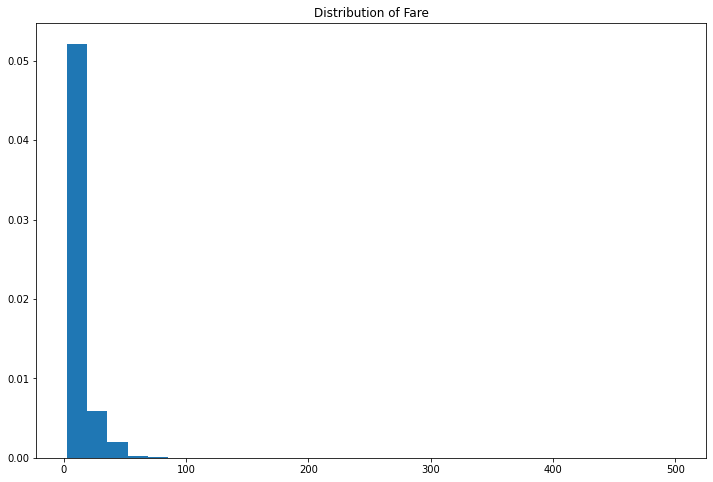

In [20]:
plt.figure(figsize = (12,8))
plt.hist(df['fare_amount'], density = True, bins=30)
plt.title('Distribution of Fare')
plt.show()

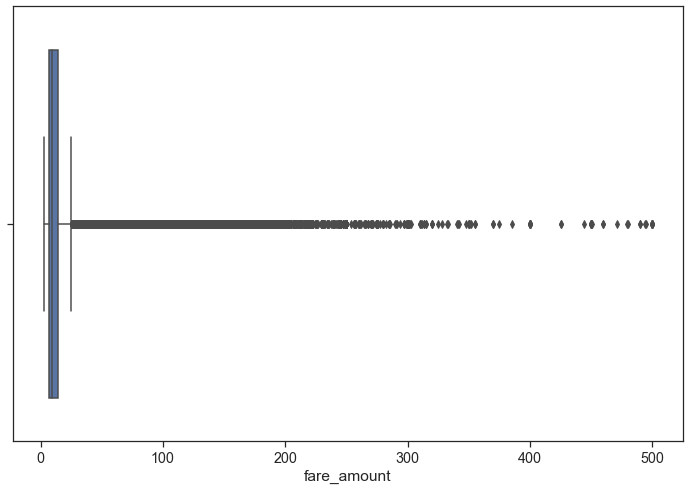

In [21]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")

sns.boxplot(x='fare_amount', 
            data=df)


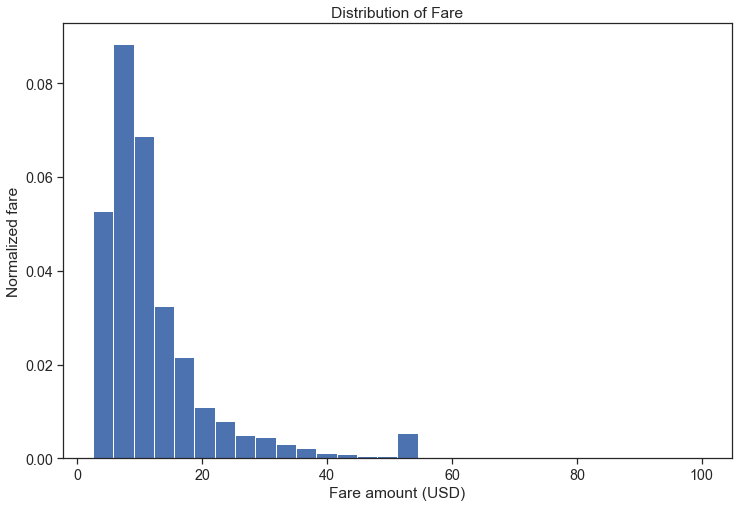

In [22]:
plt.figure(figsize = (12,8))
plt.hist(df[df['fare_amount']<100]['fare_amount'], density = True, bins=30)
plt.title('Distribution of Fare')
plt.ylabel('Normalized fare')
plt.xlabel('Fare amount (USD)')
plt.show()

There are zero trip with zero fare amount and the minimum fare in our dataset is 2.5. Based on https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%242.50%20initial%20charge.,Dutchess%2C%20Orange%20or%20Putnam%20Counties. minimum taxi fare is 2.5. We  also drop the fare amount less than 2.5 and bigger than $100. We justify this based on the limited number of fares outside this bounds, but it might be possible that including these value can help the model!

In [23]:
df = df[df['fare_amount'].between(left = 2.5, right = 100)]


In [24]:
print('Total data size is {}'.format(df.shape))


Total data size is (15094653, 21)


#### Tips

In [25]:
df['tip_amount'].describe()

count    1.509465e+07
mean     1.341058e+00
std      2.098763e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+02
Name: tip_amount, dtype: float64

#### Basic Question d - What is the distribution of tip amount?

The average of tip amount is 1.34 USD which is around 10% of average fare amount. One can be hypothesis is that the passenger tip is around 10% of their fare amount.

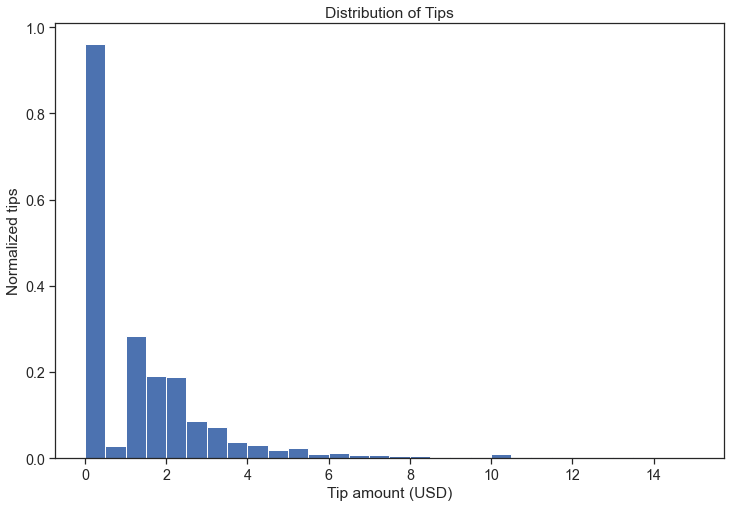

In [26]:
plt.figure(figsize = (12,8))
plt.hist(df[df['tip_amount']<15]['tip_amount'], density = True, bins=30)
plt.title('Distribution of Tips')
plt.ylabel('Normalized tips')
plt.xlabel('Tip amount (USD)')
plt.show()

In [27]:
((df[df['tip_amount']==0].shape[0])/len(df))*100

47.81560066336073

47.81% of passengers do not give any tips at all. We analyse this further in the notebook Part 2- Classifier.

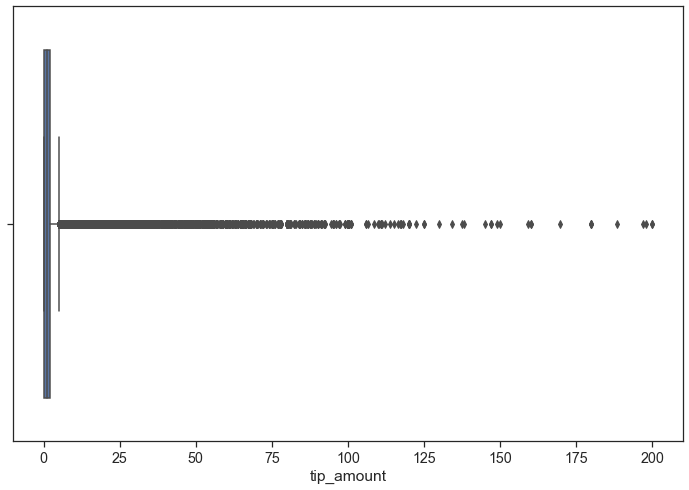

In [28]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")
sns.boxplot(x='tip_amount',           
            data=df)

#### Basic Question e - What is the distribution of total amount?

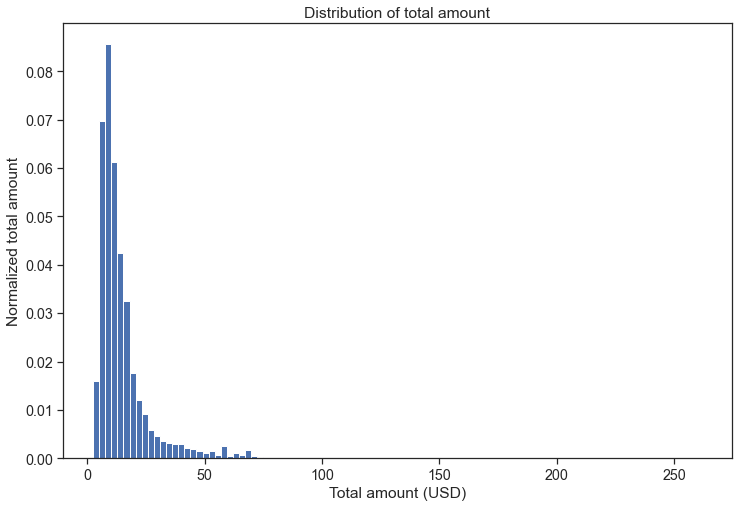

In [29]:
plt.figure(figsize = (12,8))
plt.hist(df['total_amount'], density = True, bins=100)
plt.title('Distribution of total amount')
plt.ylabel('Normalized total amount')
plt.xlabel('Total amount (USD)')
plt.show()

As expected, total amount distribution is very similar to the fare amount distribution. Total_amount is the sum of tip_amount, fare_amount, tolls_amount, mta_tax and surcharge. Note that, the fare amount value should have a highest contribution in total amount. 

Moreover, we do not need a feature in which has the information from the target value (fare_amount or tip_amount). So, we won't use them as our features in modeling notebook part2 and part3.

In [30]:
(df['fare_amount']+df['tip_amount']+df['tolls_amount']+df['mta_tax']+df['surcharge']).sum()

220895031.49999976

In [31]:
df['total_amount'].sum()

220895031.49999976

In [32]:
df.drop(['total_amount'], axis=1, inplace=True)

In [33]:
print('Total data size is {}'.format(df.shape))

Total data size is (15094653, 20)


The pickup_datetime and dropoff_datetime columns are in object format. We convert them to datetime.

In [34]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [35]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

Check the period of time in which the taxis pickup and drop off passengers.



In [36]:
print('Time of pick off ranges from ' + str(df['pickup_datetime'].min()) + ' to ' + str(df['pickup_datetime'].max()))


Time of pick off ranges from 2013-04-01 00:00:00 to 2013-04-30 23:59:58


In [37]:
print('Time of drop off ranges from ' + str(df['dropoff_datetime'].min()) + ' to ' + str(df['dropoff_datetime'].max()))


Time of drop off ranges from 2013-04-01 00:00:00 to 2013-05-01 02:19:25


We randomly check the trip_time_in_sec with pickup/dropoff datetime to find whether the trip durations are consistent with the intervals between the pickup/dropoff datetime.

In [38]:
df[df['dropoff_datetime']=='2013-05-01 02:19:25'][['medallion', 'trip_time_in_secs','pickup_datetime','dropoff_datetime']]

,medallion,trip_time_in_secs,pickup_datetime,dropoff_datetime
3251160,7C7C11F8BA8965E375A1C1ED2BA52BA8,207,2013-04-30 22:51:08,2013-05-01 02:19:25


We can notice a discrepancy by looking at the pickup_datetime, dropoff_datetime and trip_time_in_secs columns.

In [39]:
df['trip_time_in_secs'].max()

10800

In [40]:
df[df.trip_time_in_secs == 10800]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
9093471,6BC931AA7CF5582444A4DF2951CBA535,6B6363BC3A6433C39A97D684222D7AAE,VTS,2,NaN,2013-04-21 16:05:00,2013-04-21 19:05:00,1,10800,17.82,-73.776711,40.645351,-73.985428,40.758076,CRD,52.0,0.0,0.5,13.0,0.00
9094069,BCE67E21E58E32E2B043FF9FB108553B,DFF0556594493E58AE9E495A2EF21119,VTS,2,NaN,2013-04-21 16:06:00,2013-04-21 19:06:00,1,10800,17.69,-73.789566,40.646992,-73.995926,40.739574,CRD,52.0,0.0,0.5,10.4,5.33


We create an additional feature "duration" to computed the duration from dropoff and pickup datetime and compare with "trip_time_in_secs" variable

In [41]:
df['duration'] = (df['dropoff_datetime']-df['pickup_datetime'])/np.timedelta64(1, "s")
df['duration'] = df['duration'].astype('int')

In [42]:
df['diff'] = df.duration - df.trip_time_in_secs

In [43]:
df[df['diff'] > 300]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,duration,diff
515983,50635F48266EDFF6E6A744EC1AEAB08D,CD0CF708DCB79653EB4CDA9A26A90DB7,CMT,2,N,2013-04-27 06:30:34,2013-04-27 06:59:19,1,856,17.1,...,-73.965210,40.759201,CSH,52.0,0.0,0.5,0.0,0.00,1725,869
524272,7C7EA825806A49F10411C1F6656E4B6B,58660194DB4B78223B2F71F542D0864B,CMT,1,N,2013-04-27 09:35:11,2013-04-27 09:45:55,1,174,1.9,...,-73.975838,40.765808,CSH,9.5,0.0,0.5,0.0,0.00,644,470
530862,A36CD4421D7F6448FB94A4B7265AA3F4,FA60438AC1719D11EB95899AF86E27C6,CMT,1,N,2013-04-27 08:25:57,2013-04-27 08:43:04,1,11,0.0,...,-73.952354,40.746792,CSH,2.5,0.0,0.5,0.0,0.00,1027,1016
530866,BCB4D4D1057F21465C0B5DB60DEB3297,DEBEEFB0774E229CE1F46FBFBAC5542C,CMT,1,N,2013-04-27 08:45:39,2013-04-27 12:34:58,1,1212,6.4,...,-73.970604,40.673313,CSH,9.5,0.0,0.5,0.0,0.00,13759,12547
556855,6BD1B641A1CD55803A21560299B985A7,A33DB5A909ADBFCE2AB057264141C8E9,CMT,1,N,2013-04-19 06:38:32,2013-04-19 07:00:10,1,242,1.2,...,-73.952400,40.766281,CRD,5.5,0.0,0.5,1.0,0.00,1298,1056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12754875,3932F94A3EEC2B46F8F3BEF17CF0FE6C,12D8C33BF2FDA7308C6AF52FCB6DC774,CMT,1,N,2013-04-14 21:49:09,2013-04-14 22:13:24,1,742,7.8,...,-73.975807,40.765636,CSH,26.0,0.5,0.5,0.0,0.00,1455,713
12765856,DF766411CEF1BFC682CA77FEF6662310,CECB11BE6CBB7CB5CFE1EE6F6AF08179,CMT,1,N,2013-04-14 19:31:03,2013-04-14 19:43:48,1,409,2.0,...,-73.979431,40.729946,CSH,10.5,0.0,0.5,0.0,0.00,765,356
12784622,0AD9AEDF8965687A1B8AE575EDD96774,9D07687F82CE28B5108D41E9ACD0AF0A,CMT,2,N,2013-04-14 20:25:13,2013-04-14 21:01:45,1,923,18.3,...,-73.985634,40.759579,CSH,52.0,0.0,0.5,0.0,5.33,2192,1269
12785221,6C077CEF2A2D7B8BDA9AAA4AE5E52600,448B8B911B7053901820257C6D98DC5A,CMT,1,N,2013-04-14 18:36:47,2013-04-14 19:19:18,1,1097,3.1,...,-73.986656,40.730042,CSH,16.0,0.0,0.5,0.0,0.00,2551,1454


So, we created a new column named 'diff' which is the difference between our calculated duration and trip_time_in_secs. We have 3726 records that have a discrepancy of 300 seconds.

The 'duration' parameter is chosen over trip_time_in_secs since there are some differences between the drop and pick up time and the trip_time_in_secs as shown above. 

In [44]:
df = df.drop('diff', axis=1)

In [45]:
df.duration.describe()

count    1.509465e+07
mean     7.471620e+02
std      8.030485e+02
min     -5.270000e+02
25%      3.600000e+02
50%      6.000000e+02
75%      9.600000e+02
max      1.816389e+06
Name: duration, dtype: float64

We drop the observations where the duration time are negative

In [46]:
df[df['duration'] < 0]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,duration
613951,462F41CEF2DAC35B85094FE4254E7800,FE19128383195558898CD9A6FB7E0AE1,CMT,1,N,2013-04-27 14:02:44,2013-04-27 14:02:00,2,2,1.7,...,40.727394,-74.005432,40.727394,CSH,2.50,0.0,0.5,0.00,0.00,-44
651149,FA63A1D39D6828F8C401A977C7D6879A,707468D8E02602D48F19D99A0720DA17,CMT,1,N,2013-04-27 16:32:11,2013-04-27 16:29:00,1,30,0.1,...,40.778156,-73.960159,40.778858,NOC,2.50,0.0,0.5,0.00,0.00,-191
722957,7FBE8D7FE6F3A85DBFB4A3DDEAD76CA1,FD3581760E90856F4BB4CCB062C85DCE,CMT,1,N,2013-04-21 03:19:32,2013-04-21 03:19:00,2,8,0.8,...,40.722382,-73.987511,40.722397,NOC,2.50,0.5,0.5,0.00,0.00,-32
740200,D7641AA04B3C8CD9DF524A0B11E0357D,D7C8D417D823BDDCAC27BE01528ACECB,CMT,0,N,2013-04-18 20:19:02,2013-04-18 20:19:01,1,0,0.0,...,0.000000,0.000000,0.000000,CRD,69.38,0.0,0.0,0.00,0.00,-1
1049374,C7E2AE0162BDDED667595AE0D31F8088,BC073F1B6F7D8AE519EBA555031EFECC,CMT,1,N,2013-04-23 19:21:49,2013-04-23 19:20:00,1,5,3.9,...,40.827518,-73.945724,40.827518,CRD,2.50,1.0,0.5,13.00,0.00,-109
1100552,722481A46D78DA2DA5354AB0DE197D3B,F6F2E67FB1E355060AA72C6BDD99A7DB,CMT,3,N,2013-04-23 20:14:20,2013-04-23 20:13:00,1,9,6.7,...,40.719616,-73.998116,40.719627,CRD,20.00,0.5,0.0,9.50,0.00,-80
1136839,555532182AC72641D2C09DC95DFC78FD,57DC78CD80BF490A5845DA2A93051971,CMT,1,N,2013-04-20 01:30:43,2013-04-20 01:29:00,4,3,1.5,...,40.792503,-73.966339,40.792503,CRD,2.50,0.5,0.5,6.00,0.00,-103
1230152,49CC652C956E7166E56A91FA2FA2D9A7,7EECC2251CA96C36928E9CD41694C85A,CMT,1,N,2013-04-19 18:49:42,2013-04-19 18:49:00,1,6,1.2,...,40.744881,-73.948784,40.744900,NOC,2.50,1.0,0.5,0.00,0.00,-42
1255246,073E554D0345EFB08A9FE38C61AD2335,CB850648762C800712DBEFF9A3B5B036,CMT,1,N,2013-04-20 19:53:55,2013-04-20 19:52:00,1,13,3.7,...,40.758266,-73.990211,40.758263,NOC,2.50,0.0,0.5,0.00,0.00,-115
1319941,CD847FE5884F10A28217E9FBA11B275B,5FEFD00D9773268B72EE4E879852F190,CMT,5,N,2013-04-25 12:11:06,2013-04-25 12:10:00,1,32,1.6,...,40.764736,-73.969925,40.764740,CRD,12.00,0.0,0.0,2.40,0.00,-66


In [47]:
df=df.drop(df[df['duration'] < 0].index, axis=0)

In [48]:
df.shape

(15094595, 21)

### Distribution of trip duration

In [49]:
df.duration

0            760
1            540
2           1318
3            803
4           1018
            ... 
15100463     480
15100464    1080
15100465    3120
15100466     960
15100467     840
Name: duration, Length: 15094595, dtype: int32

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


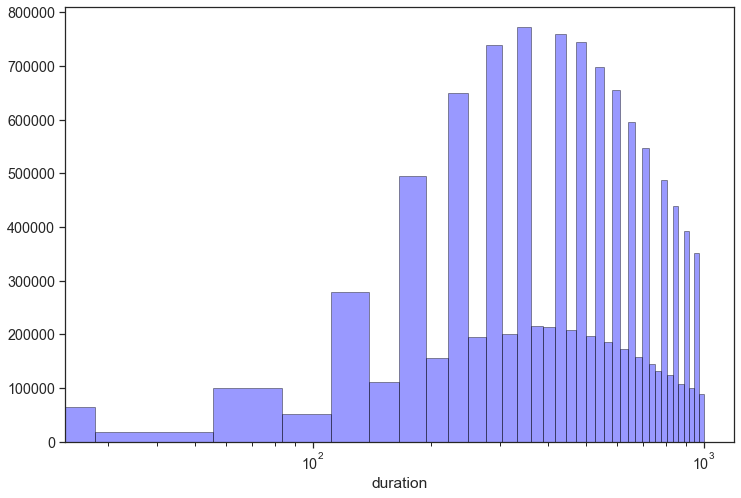

In [50]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")

dataplot= df[df['duration']<1e3]
sns.distplot(dataplot['duration'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}) 
# plt.yscale('log')
plt.xscale('log')

In [51]:
df['duration'].sort_values()

4934208           0
6824629           0
14281518          0
12146987          0
12541850          0
             ...   
9799197       86380
9312912      123422
2625338      606632
2438166     1210079
1335297     1816389
Name: duration, Length: 15094595, dtype: int32

The record for maximum time duration is about 21 days which does not make sense. 

Let us plot the trip duration in seconds to view any other possible outliers.

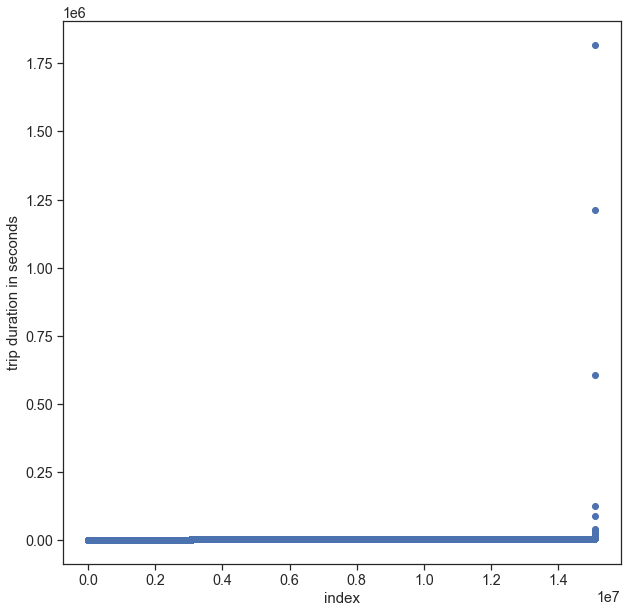

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df["duration"])), np.sort(df["duration"]))
plt.xlabel('index', fontsize=15)
plt.ylabel('trip duration in seconds',fontsize=15)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dffb6e6588>,
 'caps': [<matplotlib.lines.Line2D at 0x1dffb4a5e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dffb6ced48>],
 'medians': [<matplotlib.lines.Line2D at 0x1dffb4aabc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dffb4aad08>],
 'means': []}

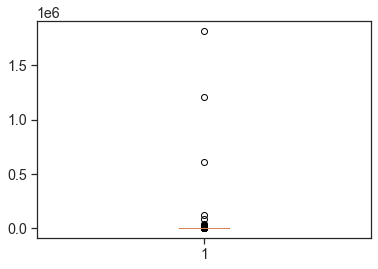

In [53]:
plt.boxplot(df["duration"])

In [54]:
len(df[df['duration']>10000])

124

In [55]:
df = df[df['duration'] < 10000]

In [56]:
df['duration'].describe()

count    1.509447e+07
mean     7.468157e+02
std      5.500247e+02
min      0.000000e+00
25%      3.600000e+02
50%      6.000000e+02
75%      9.600000e+02
max      9.969000e+03
Name: duration, dtype: float64

In [57]:
df.shape

(15094471, 21)

In [58]:
(df['duration'].max())/3600

2.7691666666666666

After dropping the excess records of duration the maximum duration is now 2.7 hours.

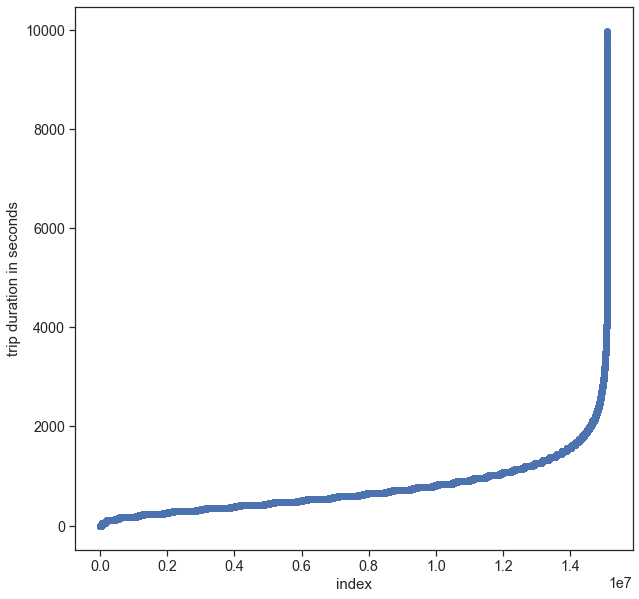

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df["duration"])), np.sort(df["duration"]))
plt.xlabel('index', fontsize=15)
plt.ylabel('trip duration in seconds',fontsize=15)
plt.show()

### Exploring the behaviour of trip_duration based on the number of trips

In order to visualize the trip duration, it is important to aggregate the trip duration at each of the pickup_datetime. Since there could be outliers in the trip duration, variable median would be a more representative measure rather than the mean.

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x720 with 0 Axes>

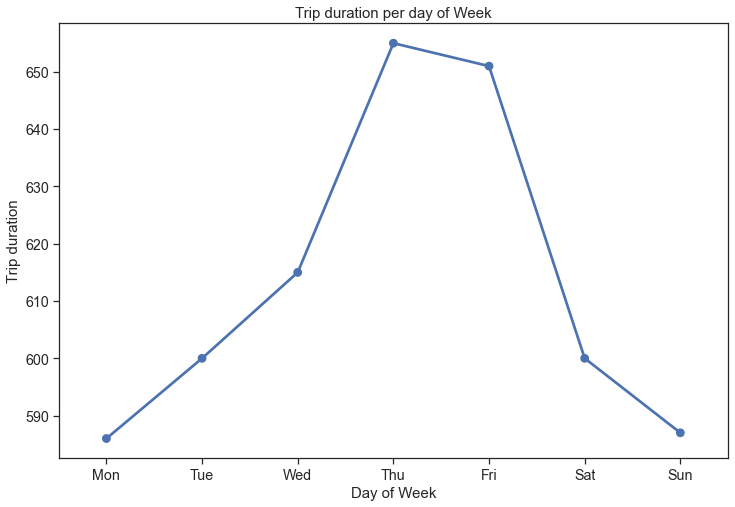

In [60]:
plt.figure(figsize=(10,10))
df_agg = df.groupby(df.pickup_datetime.dt.weekday)['duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.duration.values)

plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['duration']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Trip duration', fontsize=15)
plt.title('Trip duration per day of Week', loc='Center', fontsize=15)
plt.show()

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x720 with 0 Axes>

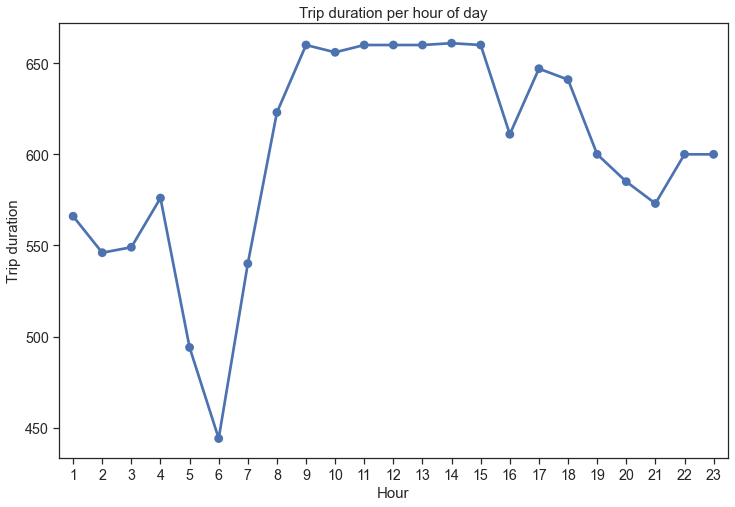

In [61]:
plt.figure(figsize=(10,10))
df_agg = df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)['duration'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.duration.values)

plt.xlabel('Hour', fontsize=15)
plt.ylabel('Trip duration', fontsize=15)
plt.title('Trip duration per hour of day', loc='Center', fontsize=15)
plt.show()

* Observation at days of week: 
  Trip durations are mostly on Thursday's, Friday's and Wednesday's  & the least on Sunday's.

* Observation at hours of day:
  Trip durations are mostly between 11:00  and 16:00 in the afternoon & the least after 04:00  and before 07:00 in the morning.

### Distribution of values of categorical columns

A few columns are categorical data, like vendor_id, store_and_fwd_flag, payment_type. 

In [62]:
df['vendor_id'].value_counts()

CMT    7579660
VTS    7514811
Name: vendor_id, dtype: int64

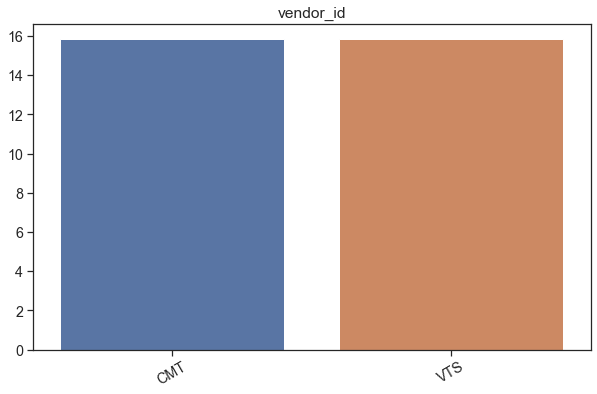

In [63]:
plotdata = df['vendor_id'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x = plotdata.index, y=np.log(plotdata.values))
plt.title('vendor_id')
plt.xticks(rotation=30)
plt.show()

vendor_id takes on only two values in datasets, VTS and CMT (Hypothesis - This could represent data from two different taxi companies)

#### Basic Question b - What is the distribution of payment_type?

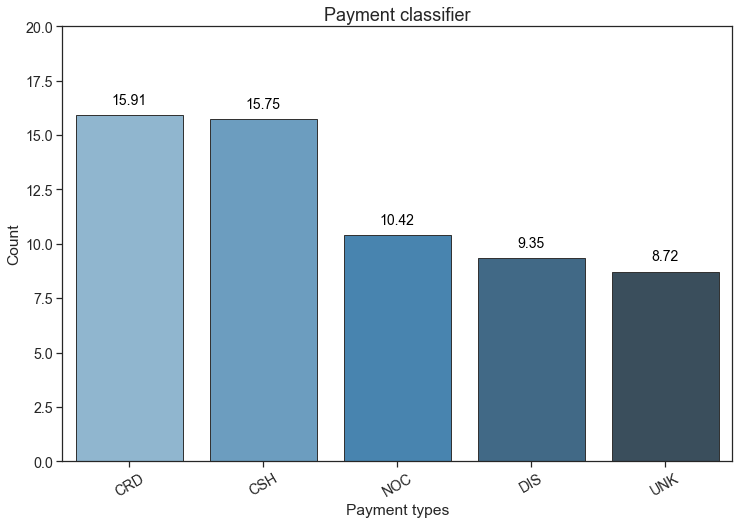

In [64]:
plotdata = df['payment_type'].value_counts()


plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")
g = sns.barplot(x = plotdata.index, 
            y=np.log(plotdata.values),
            palette="Blues_d",
            edgecolor=".2")
g.set(xlabel='Payment types', ylabel ='Count')
plt.title('Payment classifier', fontsize=18)
plt.xticks(rotation=30)



ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 15),
                textcoords='offset points')
_ = g.set_ylim(0,20) #To make space for the annotations




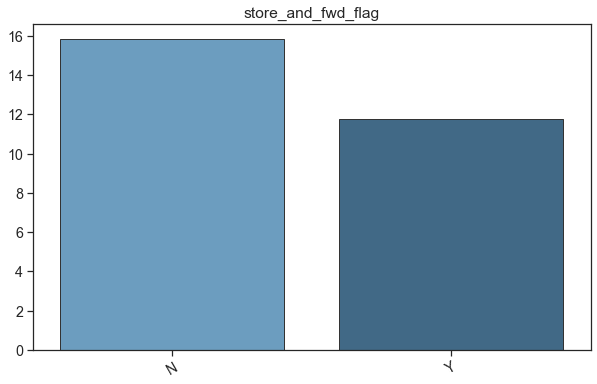

In [65]:
plotdata = df['store_and_fwd_flag'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x = plotdata.index, 
            y = np.log(plotdata.values),
            palette="Blues_d",
            edgecolor=".2")
plt.title('store_and_fwd_flag')
plt.xticks(rotation=30)
plt.show()

Store_and_fwd_flag is a flag that shows whether the trip data was sent immediately to the vendor (N) or held in the memory of the taxi because there was no connection to the server (Y). Maybe there could be a correlation with certain geographical areas with bad reception(?)

In [66]:
df.groupby(['vendor_id', 'store_and_fwd_flag']).count()['medallion']

vendor_id  store_and_fwd_flag
CMT        N                     7449054
           Y                      129894
Name: medallion, dtype: int64

There are no records of store_and_fwd_flag for the vendor_id as VTS. We will investigate later the missing values and find more about the store_and_fwd_flag variable.

In [67]:
plotdata = df[df['vendor_id']=='CMT']


In [68]:
plotdata['trip_time_in_secs']

0            759
1            540
2           1318
3            799
4           1017
            ... 
14711322     507
14711323     602
14711324     626
14711325     268
14711326     758
Name: trip_time_in_secs, Length: 7579660, dtype: int64

We look at the duration of trio for different passengers and Store_and_fwd_flag

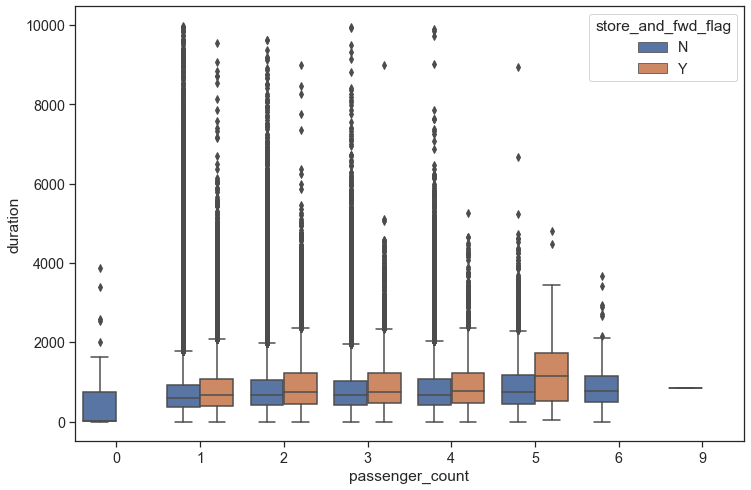

In [69]:
plotdata = df[df['vendor_id']=='CMT']

plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")
sns.boxplot(x='passenger_count',
           y='duration',
            data=plotdata,
           hue='store_and_fwd_flag')

We hypothesis that rate_code could is an integer value for rating. It should be considered as an object.

In [70]:
df['rate_code'].value_counts()

1      14768514
2        254636
5         34338
3         21654
4         14016
0          1126
6           164
210          14
65            2
8             2
208           1
206           1
77            1
9             1
7             1
Name: rate_code, dtype: int64

We drop rate_code bigger that 6 since there are not sufficient data available.

In [71]:
df['rate_code']=df['rate_code'].astype('int')

In [72]:
df = df[df['rate_code'] < 7]

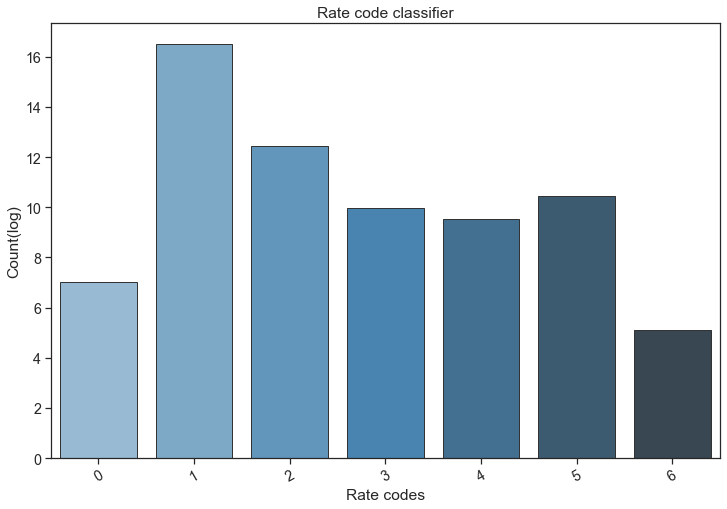

In [73]:
plotdata = df['rate_code'].value_counts()

plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")

g=sns.barplot(x = plotdata.index, y=np.log(plotdata.values),
             palette="Blues_d",
            edgecolor=".2")
g.set(xlabel='Rate codes', ylabel ='Count(log)')
plt.title('Payment classifier', fontsize=18)
plt.xticks(rotation=30)
plt.title('Rate code classifier')

plt.show()

In [74]:
df['rate_code'] = df['rate_code'].astype(str)
df['rate_code'].dtypes

dtype('O')

### Number of passengers

#### Basic Question a - What is the distribution of number of passengers?

Text(0.5, 1.0, 'Passenger Counts')

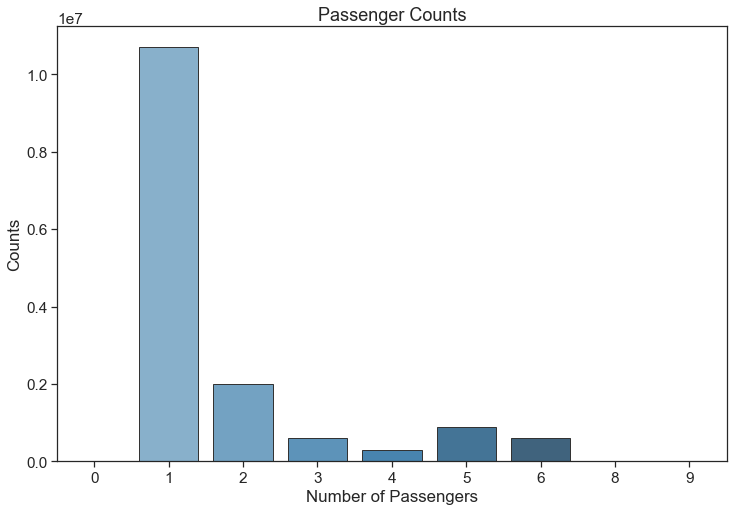

In [75]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.set_style("ticks")

plotdata = df['passenger_count'].value_counts()
g = sns.barplot(x = plotdata.index, 
            y=plotdata.values,
            palette="Blues_d",
            edgecolor=".2")
g.set(xlabel='Number of Passengers', ylabel ='Counts')
plt.title('Passenger Counts', fontsize=18)
# plt.ylabel('Count', fontsize=18)
# plt.xticks(rotation=30)

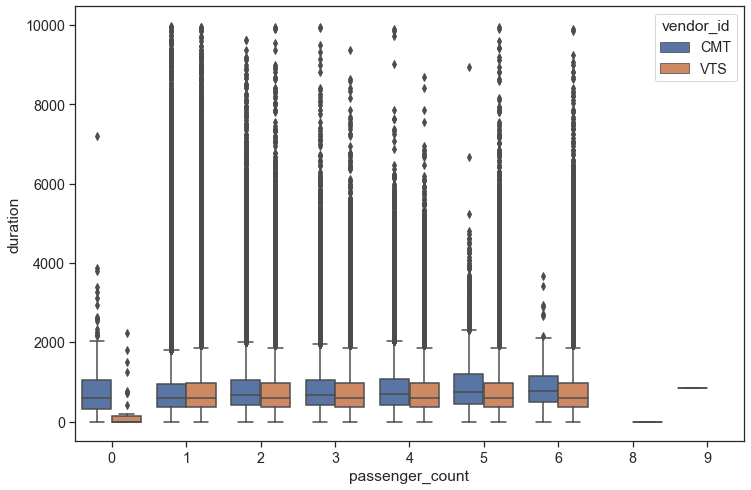

In [76]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")
sns.boxplot(x='passenger_count',
           y='duration',
            data=df,
           hue='vendor_id')


Both companies have records with 0 passenger. The time duration is slightly different in passenger 5 and 6 between both companies.

In [77]:
df['passenger_count'].value_counts()

1    10702417
2     1984828
5      890060
3      609651
6      609272
4      297996
0         222
9           1
8           1
Name: passenger_count, dtype: int64

The majority of rides had only a single passenger, and with a far distance, the two passenger rides take the second place.

In [78]:
len(df[(df['passenger_count'] ==8)|(df['passenger_count'] == 9)])

2

We remove the passenger counts greater than 6.

In [79]:
df = df[df['passenger_count'] <= 6 ]

In [80]:
df.shape

(15094446, 21)

Let's have a close look at the zero values passenger_count.

In [81]:
len(df[(df['passenger_count'] == 0)])

222

There are 222 records for taxis without any passenger. We check for ones who the number of passengers are zero and the tip amounts are none zero. We drop them from the dataset.

In [82]:
len(df[(df['passenger_count'] == 0)&(df['tip_amount'] != 0)])

37

In [83]:
df= df.drop(df[(df['passenger_count'] == 0)&(df['tip_amount'] != 0)].index, axis=0)

In [84]:
df.shape

(15094409, 21)

In [85]:
df.groupby('passenger_count')['fare_amount'].agg(['mean', 'count'])

,mean,count
passenger_count,,
0,21.940216,185
1,12.057089,10702417
2,12.892888,1984828
3,12.522261,609651
4,12.745002,297996
5,12.343309,890060
6,12.251073,609272


C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


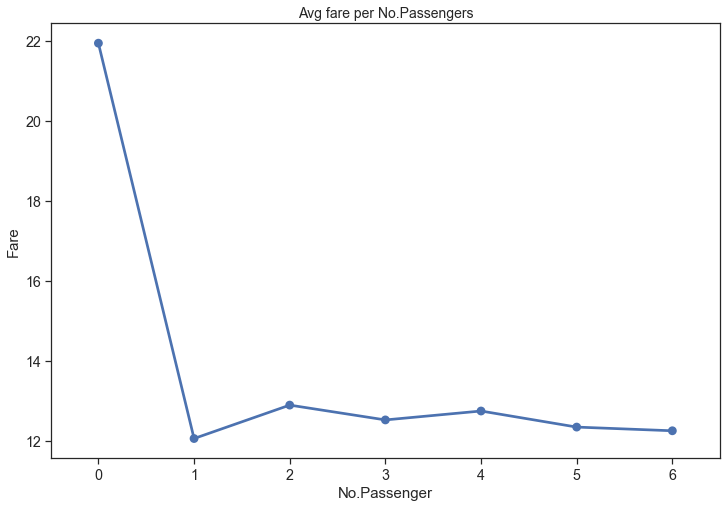

In [86]:
df_agg = df.groupby(df.passenger_count)['fare_amount'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.passenger_count, df_agg.fare_amount.values)

plt.xlabel('No.Passenger', fontsize=15)
plt.ylabel('Fare', fontsize=15)
plt.title('Avg fare per No.Passengers', loc='Center', fontsize=14)
plt.show()

In total, there is not any significant difference in average amount of fare for taxis with different number of passengers. As we expect, it indicates that the fare amount does not depend of the number of passengers.  

Taxi with 2 and 4 passengers, they get paid slightly more.

We decided to drop those records where the number of passengers are zero and the average fare amount is above the average of total.

In [87]:
df = df.drop(df[df.passenger_count == 0].index, axis=0)

In [88]:
df.shape

(15094224, 21)

### Distribution of the number of passengers across the vendor_id variables VTS and CMT 

Text(0.5, 1.0, 'Distribution of the number of passengers across the VTS')

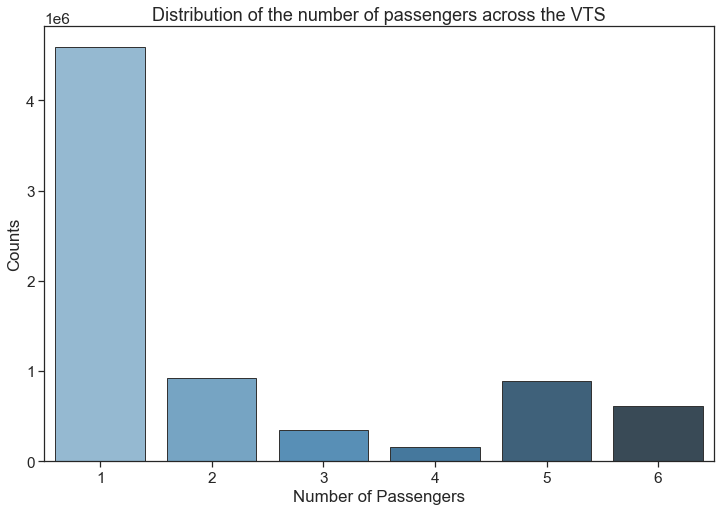

In [89]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.set_style("ticks")

g=sns.countplot(x="passenger_count", data=df[df["vendor_id"] == 'VTS'],
             palette="Blues_d",
            edgecolor=".2")
g.set(xlabel='Number of Passengers', ylabel ='Counts')
plt.title('Distribution of the number of passengers across the VTS', fontsize=18)


Text(0.5, 1.0, 'Distribution of the number of passengers across the CMT')

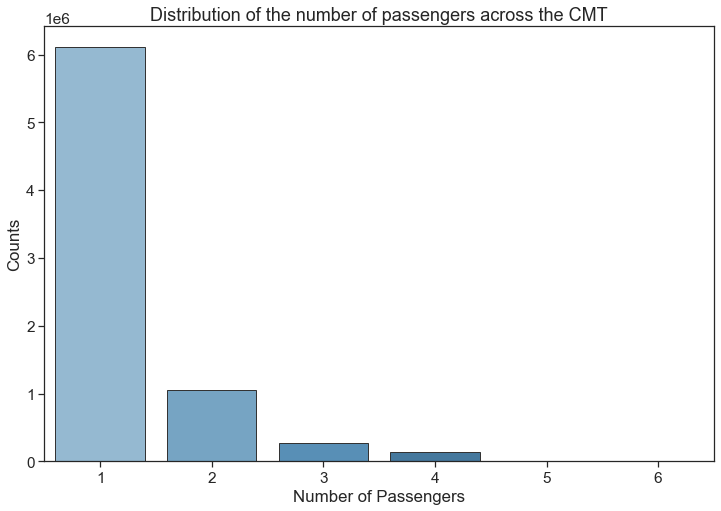

In [90]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.set_style("ticks")

g=sns.countplot(x="passenger_count", data=df[df["vendor_id"] == 'CMT'],
             palette="Blues_d",
            edgecolor=".2")
g.set(xlabel='Number of Passengers', ylabel ='Counts')
plt.title('Distribution of the number of passengers across the CMT', fontsize=18)


Both companies have similar passengers numbers.

We have created the day and week variables from pickup and dropoff datetime for further analysis.

In [91]:
pickup = df['pickup_datetime']
dropoff = df['dropoff_datetime']
df['pickup_hour'] = pickup.apply(lambda i: i.hour)
df['pickup_day'] = pickup.apply(lambda i: i.dayofweek)
df['dropoff_hour'] = dropoff.apply(lambda i: i.hour)
df['dropoff_day'] = dropoff.apply(lambda i: i.dayofweek)

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


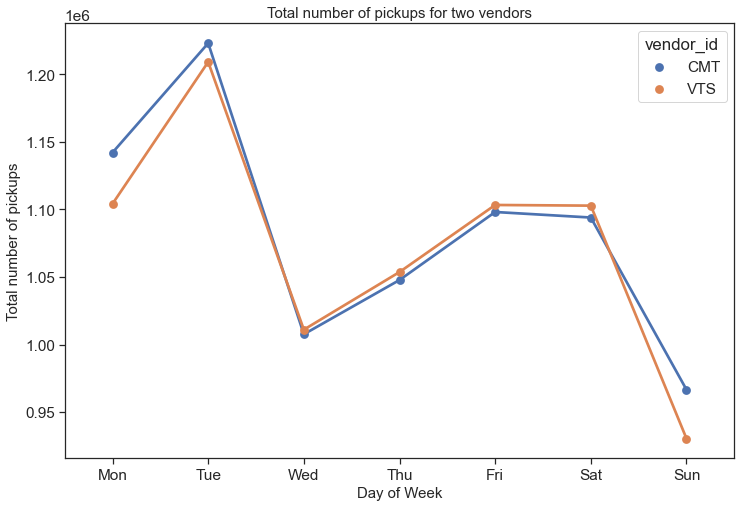

In [92]:
df_agg = df.groupby(['vendor_id', 'pickup_day'])['medallion'].count().reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_day, df_agg.medallion.values,hue=df_agg.vendor_id)

plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Total number of pickups', fontsize=15)
plt.title('Total number of pickups for two vendors', loc='Center', fontsize=15)
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


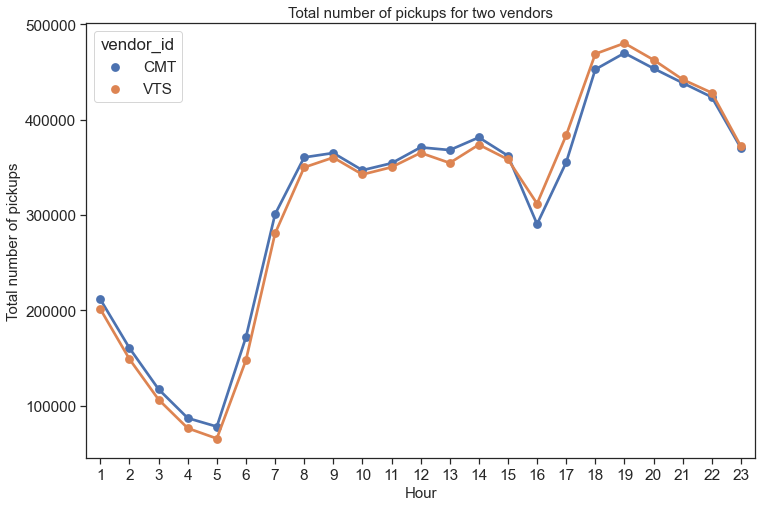

In [93]:
df_agg = df[df.pickup_hour !=0].groupby(['vendor_id', 'pickup_hour'])['medallion'].count().reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_hour, df_agg.medallion.values, hue=df_agg.vendor_id)

plt.xlabel('Hour', fontsize=15)
plt.ylabel('Total number of pickups', fontsize=15)
plt.title('Total number of pickups for two vendors', loc='Center', fontsize=15)
plt.show()

We can confirm here that the vendor id is not an important feature. The trend for two vendors has similar behavior.

### Trend of hourly pick up number:


In [94]:
# plt.figure(figsize = (12,8))
# sns.set(font_scale = 1.3)
# sns.set_style("ticks")

# g=sns.barplot(df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)[['passenger_count']].count().index, 'passenger_count',
#             data=df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)[['passenger_count']].count(),
#             color ='lightskyblue', 
#             linewidth=1,
#             edgecolor=".1"
#            )

# g.set(xlabel='Hour', ylabel ='Count')
# # plt.xlabel('Hour', fontsize=18)
# # plt.ylabel('Count', fontsize=18)
# plt.title('Count of passenger per Hour', loc='Center', fontsize=18)
# plt.tight_layout()
# plt.show()

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


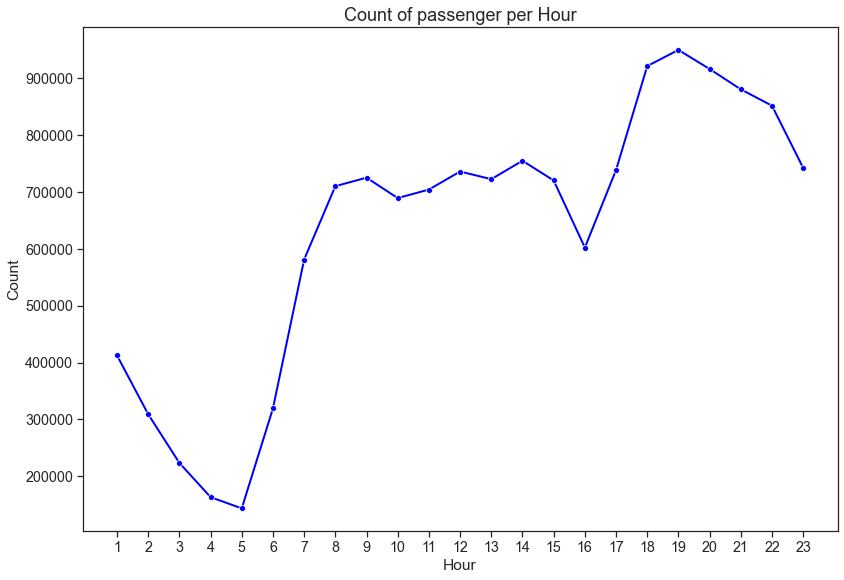

In [95]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")
plotdata=df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)[['passenger_count']].count()

g= sns.lineplot(plotdata.index, 'passenger_count',
            data=plotdata,
             color = 'blue',
             lw=2,
             marker="o"
             )

locator = mdates.DayLocator(interval=1)
g.xaxis.set_major_locator(locator)

g.set(xlabel='Hour', ylabel ='Count')
plt.title('Count of passenger per Hour', loc='Center', fontsize=18)
plt.tight_layout()
plt.xticks(ticks=plotdata.index)
plt.show()

The most crowded time of the day are 7 to 10 AM in the morning and 6 to 8 PM in the evening.

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


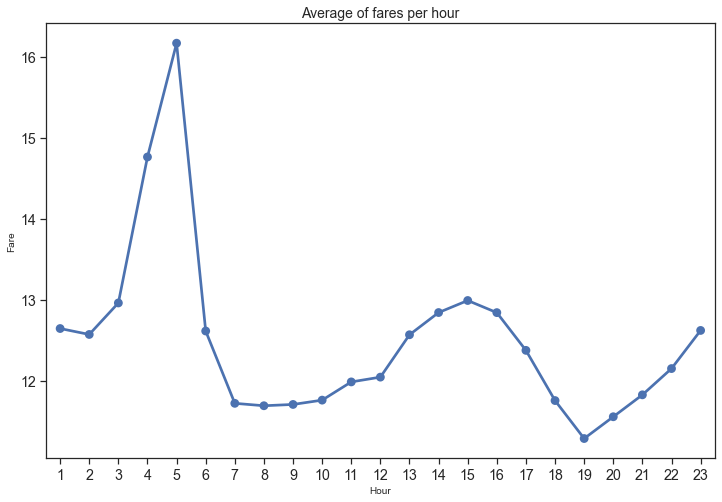

In [96]:
df_agg = df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)['fare_amount'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.fare_amount.values)

plt.xlabel('Hour', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.title('Average of fares per hour', loc='Center', fontsize=14)
plt.show()

The fare values seem to be high at the time of the day between 4 to 6 AM, and 2 to 5 PM.

### Trend of weekly pick up number:


C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of passenger per Day of Week')

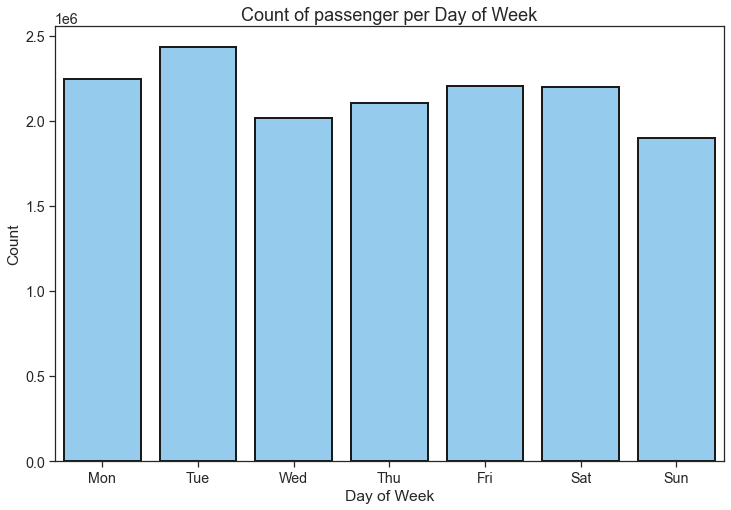

In [97]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.3)
sns.set_style("ticks")

g=sns.barplot(df.groupby(df.pickup_datetime.dt.weekday)[['passenger_count','vendor_id']].count().index, 'passenger_count', 
            data=df.groupby(df.pickup_datetime.dt.weekday)[['passenger_count','vendor_id']].count(), 
            color='lightskyblue', 
            linewidth=2,
           
            edgecolor=".1")
plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['passenger_count','vendor_id']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

g.set(xlabel='Day of Week', ylabel ='Count')
# plt.xlabel('Day of Week', fontsize=10)
# plt.ylabel('Count', fontsize=10)
plt.title('Count of passenger per Day of Week', loc='Center', fontsize=18)

The result shows a large number of passengers for Tuesday(s), Friday(s) and Saturday(s). On Sunday(s), taxi drivers should expect the least number of passengers.

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


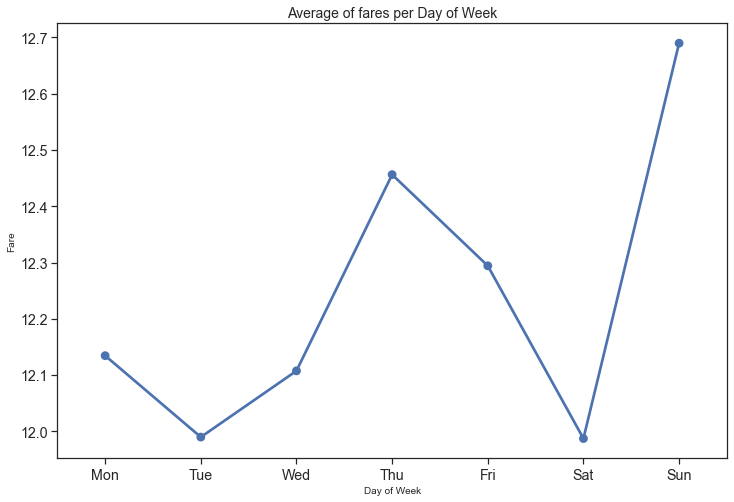

In [98]:
df_agg = df.groupby(df.pickup_datetime.dt.weekday)['fare_amount'].aggregate(np.mean).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.fare_amount.values)

plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['fare_amount']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.title('Average of fares per Day of Week', loc='Center', fontsize=14)
plt.show()

We can see, the highest fare values for Sunday(s) and Thursday(s), and the lowest for Tuesday(s) and Saturday(s). Maybe people travel far distances on Sunday(s) e.g. visiting family. And on Saturday(s), maybe people are mostly stay indoors and or have short traveling distances inside city.

#### Basic Questions f - What are top 5 busiest hours of the day?

In order to answer this question we can look at the heatmap of the day(s) vs number of passengers per time of the day.

In [99]:
df.passenger_count

0           1
1           1
2           1
3           1
4           1
           ..
15100463    1
15100464    1
15100465    1
15100466    2
15100467    1
Name: passenger_count, Length: 15094224, dtype: int64

In [100]:
df_busy = df.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].size().reset_index()

In [101]:
df_busy_pivot = pd.pivot_table(df_busy, values= 'passenger_count', 
                               index=['pickup_hour'], 
                               columns=['pickup_day'], 
                               fill_value=0)

In [102]:
df_busy_pivot.set_axis([['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']], axis=1, inplace=True)

In [103]:
df_busy_pivot

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
pickup_hour,,,,,,,
0,49152,58019,56403,63338,87704,126618,129482
1,29105,32547,32738,38026,56797,107951,115517
2,18520,19839,20025,24124,37356,88021,101238
3,12436,12824,13286,15314,25366,64244,80018
4,13902,12489,12129,13772,19584,40804,50599
5,23122,21443,17740,18966,20379,19752,22102
6,61557,61529,51381,51727,50543,22599,20183
7,109523,118113,96810,98305,95215,35320,28163
8,131036,140320,115210,116482,115085,53037,39333


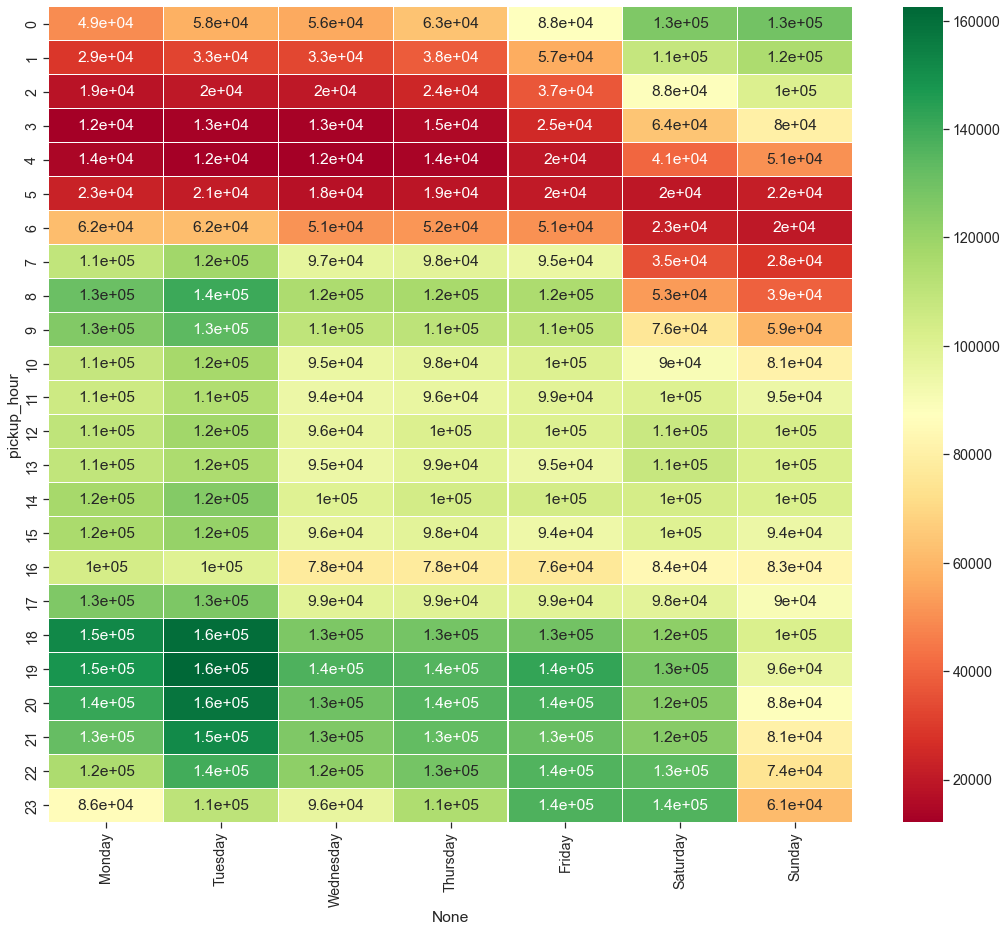

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(df_busy_pivot,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,15)
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Hour of Day', fontsize=14)
ax.set_title('Passengers traveling by taxi', fontsize=16)

plt.show()

The busiest hours are 6 to 8 PM on Tuesday(s) and 6 to 7 PM on Monday(s) evening.

### Latitude and longitude

In [105]:
df['pickup_longitude'].describe()

count    1.509422e+07
mean    -7.273909e+01
std      9.713986e+00
min     -2.323420e+03
25%     -7.399213e+01
50%     -7.398173e+01
75%     -7.396677e+01
max      2.228722e+03
Name: pickup_longitude, dtype: float64

Latitudes range are from -90 to 90, and longitudes range are from -180 to 80. I will drop data out of this range. 

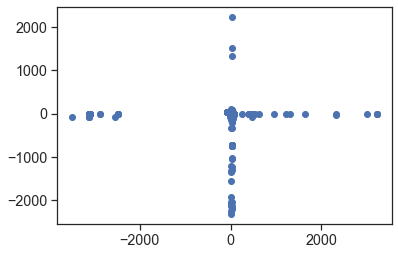

In [106]:
plt.scatter(df.pickup_latitude,df.pickup_longitude)

In [107]:
#We need to drop these outliers
df = df.drop((df[(df['pickup_latitude']<-90)|(df['pickup_latitude']>90)]).index, axis=0)
df = df.drop((df[(df['pickup_longitude']<-180)|(df['pickup_longitude']>180)]).index, axis=0)

In [108]:
df.shape

(15094133, 25)

Similar operation for dropoff latitude and longitude

In [109]:
df = df.drop((df[(df['dropoff_latitude']<-90)|(df['dropoff_latitude']>90)]).index, axis=0)
df = df.drop((df[(df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180)]).index, axis=0)

In [110]:
df.shape

(15094043, 25)

Text(0, 0.5, 'pickup_longitude')

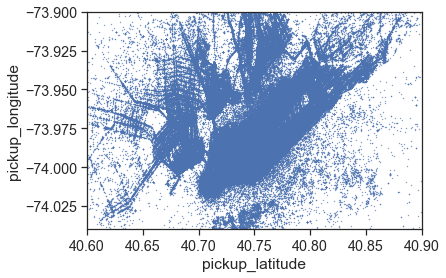

In [111]:
plt.scatter(df.pickup_latitude,df.pickup_longitude,s=0.1,c='b' )
plt.xlim([40.6, 40.9])
plt.ylim([-74.04,-73.9])
plt.xlabel('pickup_latitude')
plt.ylabel('pickup_longitude')

We can see a very large number of pickups in Manhattan, falling off as we move away from the city center. 

(array([5.0000000e+00, 3.0000000e+00, 8.0000000e+01, 1.4833388e+07,
        7.0000000e+00, 4.3000000e+01, 2.6025200e+05, 2.5900000e+02,
        4.0000000e+00, 2.0000000e+00]),
 array([-157.8177  , -131.937145, -106.05659 ,  -80.176035,  -54.29548 ,
         -28.414925,   -2.53437 ,   23.346185,   49.22674 ,   75.107295,
         100.98785 ]),
 <a list of 10 Patch objects>)

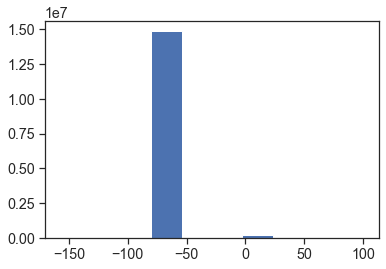

In [112]:
plt.hist(data=df, x="dropoff_longitude")

(30.0, 45.0)

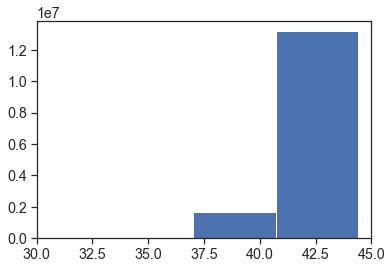

In [113]:
plt.hist(data=df, x="pickup_latitude",bins=40)
plt.xlim([30, 45])
# plt.ylim([-74.04,-73.9])

We also remove any locations outside of manhattan

In [114]:
df = df.drop(df[df['pickup_latitude']<10].index, axis=0)

In [115]:
def generateBaseMap(default_location=[40.71, -74], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [116]:
# Make an empty map
NYC_location = [40.71, -74]
m = generateBaseMap(default_location=NYC_location)


In [117]:
location=[]
for i in range(0, len(df.head(1000))):
    location.append([df.iloc[i]['pickup_latitude'], df.iloc[i]['pickup_longitude']])

In [118]:
HeatMap(location).add_to(m)
m

In [119]:
m.save(outfile= "heatmap_taxi.html")

Most of the trips take place in NYC and there are some rides to the John F Kennedy and LaGuardia Airports

Introduce a new variable for the LaGuardia Airport

In [120]:
LaGu_airport_pick_coor=df[((df['pickup_longitude'] >= -73.8732622) & (df['pickup_longitude'] <= -73.872666) &
         (df['pickup_latitude']>=40.7722) & (df['pickup_latitude']<=40.778))]  

In [121]:
LaGu_airport_pick_coor.shape

(42463, 25)

In [122]:
LaGu_airport_drop_coor=df[((df['dropoff_longitude'] >= -73.8732622) & (df['dropoff_longitude'] <= -73.872666) &
                           (df['dropoff_latitude'] >= 40.7722) & (df['dropoff_latitude'] <= 40.778))]

In [123]:
LaGu_airport_drop_coor.shape

(17389, 25)

In [124]:
LaGu_airport = LaGu_airport_pick_coor.append(LaGu_airport_drop_coor)

In [125]:
LaGu_airport = LaGu_airport.drop_duplicates()

In [126]:
LaGu_airport.shape

(59733, 25)

In [127]:
LaGu_airport.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,duration,pickup_hour,pickup_day,dropoff_hour,dropoff_day
64,0CD863DDD8C07C8AB24F8BC82258A692,55A63A52AD48B3CB57B215CC9EDA0F45,CMT,1,N,2013-04-04 19:05:08,2013-04-04 19:21:17,1,968,8.10,...,23.5,1.0,0.5,5.00,5.33,969,19,3,19,3
74,9A534398CF9CE1D487B981BDC2BC6620,84A276E9E0FA67A616B06C3A1469297F,CMT,1,N,2013-04-03 19:05:55,2013-04-03 19:23:25,1,1049,8.60,...,25.0,1.0,0.5,6.36,5.33,1050,19,2,19,2
1092,9F85EEA15BC5F9136203D7FC43B6636B,9D90D46608B08B2A0BE916F910BADB2D,VTS,1,NaN,2013-04-12 20:07:00,2013-04-12 20:32:00,1,1500,12.06,...,35.5,0.5,0.5,5.50,0.00,1500,20,4,20,4
1389,379463A755417A5299F3A9F0534FE8FE,AFBE22BB0BC8FF0CB6DE377965EC0594,VTS,1,NaN,2013-04-12 23:15:00,2013-04-12 23:37:00,1,1320,10.26,...,30.0,0.5,0.5,0.00,0.00,1320,23,4,23,4
1493,183B50709C4E9ABFA21719A568874A55,BCD0D1EC9FBE34EEBECFF4DEDD2FDFC6,VTS,1,NaN,2013-04-12 20:08:00,2013-04-12 20:31:00,1,1380,10.04,...,30.0,0.5,0.5,6.00,5.33,1380,20,4,20,4


In [128]:
df['LaGu_airport'] = False
df.loc[LaGu_airport.index,'LaGu_airport'] = True

In [129]:
df.shape

(14844086, 26)

In [130]:
df['LaGu_airport'].value_counts()

False    14784353
True        59733
Name: LaGu_airport, dtype: int64

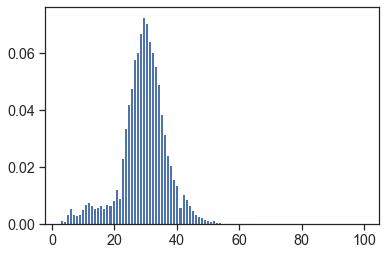

In [131]:
plotdata = df[df['LaGu_airport']==True]['fare_amount']

plt.hist(plotdata, bins=100, density=True, alpha=1, color='b')
plt.show()

It can be seen here that the fare amount for the airport is higher than the average of total fare amount, as the longer distance and duration impact on the fare amount.

#### Basic Questions g -  What are the top 10 busiest locations of the city?

In [132]:
df_busy_loc = df.copy()

df_busy_loc['pickup_longitude'] = df_busy_loc['pickup_longitude'].round(2)
df_busy_loc['pickup_latitude'] = df_busy_loc['pickup_latitude'].round(2)
df_busy_loc['dropoff_longitude'] = df_busy_loc['dropoff_longitude'].round(2)
df_busy_loc['dropoff_latitude'] = df_busy_loc['dropoff_latitude'].round(2)



In [133]:
df_busy_loc['pickup_longitude']

0          -73.96
2          -73.98
3          -73.98
4          -74.01
5          -73.99
            ...  
15100463   -73.97
15100464   -73.98
15100465   -73.78
15100466   -73.98
15100467   -73.96
Name: pickup_longitude, Length: 14844086, dtype: float64

In [134]:
df_busy_loc['pickup_loc'] = df_busy_loc['pickup_latitude'].astype(str) + ',' + df_busy_loc['pickup_longitude'].astype(str)
df_busy_loc['dropoff_loc'] = df_busy_loc['dropoff_latitude'].astype(str) + ',' + df_busy_loc['dropoff_longitude'].astype(str)

In [135]:
df_busy_loc.shape

(14844086, 28)

In [136]:
pickup = df_busy_loc.groupby('pickup_loc')['pickup_loc'].count().sort_values(ascending=False).head(10)
pickup

pickup_loc
40.76,-73.97    923906
40.75,-73.99    825308
40.76,-73.98    764194
40.75,-73.98    749148
40.74,-73.99    689174
40.76,-73.99    655078
40.73,-73.99    537455
40.77,-73.96    518584
40.77,-73.98    481191
40.73,-74.0     469096
Name: pickup_loc, dtype: int64

In [137]:
dropoff = df_busy_loc.groupby('dropoff_loc')['dropoff_loc'].count().sort_values(ascending=False).head(10)
dropoff

dropoff_loc
40.76,-73.97    840559
40.76,-73.98    826039
40.75,-73.99    763402
40.75,-73.98    742997
40.74,-73.99    602143
40.76,-73.99    538660
40.77,-73.96    500752
40.73,-73.99    439092
40.77,-73.98    410705
40.73,-74.0     404891
Name: dropoff_loc, dtype: int64

In [138]:
lat_list=[]
long_list=[]
for i in range(dropoff.shape[0]):
    lat_list.append(dropoff.index.values[i].split(',')[0])
    long_list.append(dropoff.index.values[i].split(',')[1])

top_ten_drop = pd.DataFrame() 
top_ten_drop['latitude'] = lat_list
top_ten_drop['longitude'] = long_list

In [139]:
top_ten_drop

,latitude,longitude
0,40.76,-73.97
1,40.76,-73.98
2,40.75,-73.99
3,40.75,-73.98
4,40.74,-73.99
5,40.76,-73.99
6,40.77,-73.96
7,40.73,-73.99
8,40.77,-73.98
9,40.73,-74.0


In [140]:
lat_list=[]
long_list=[]
for i in range(pickup.shape[0]):
    lat_list.append(pickup.index.values[i].split(',')[0])
    long_list.append(pickup.index.values[i].split(',')[1])

top_ten_pickup = pd.DataFrame() 
top_ten_pickup['latitude'] = lat_list
top_ten_pickup['longitude'] = long_list

In [141]:
top_ten_pickup

,latitude,longitude
0,40.76,-73.97
1,40.75,-73.99
2,40.76,-73.98
3,40.75,-73.98
4,40.74,-73.99
5,40.76,-73.99
6,40.73,-73.99
7,40.77,-73.96
8,40.77,-73.98
9,40.73,-74.0


In [142]:
def generateBaseMap(default_location=[40.71, -74], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [143]:
# Make an empty map
NYC_location = [40.71, -74]
m = generateBaseMap(default_location=NYC_location)


In [144]:
for i in range(0,10):
    
    folium.Marker(
    location = [top_ten_drop.iloc[i]['latitude'], top_ten_drop.iloc[i]['longitude']],
        popup="Dropoff",icon=folium.Icon(color="green")
    ).add_to(m) 

In [145]:
m

The 10 busiest pickup and dropoff locations are in Manhattan area. The pick up and dropoff locations are very close to each other. So, here we just illustrate the 10 busiest dropoff locations on the map. 

In [146]:
m.save(outfile= "10 busiest locations.html")

In [147]:
# Creating a new column for date
df_busy_loc['date'] = df_busy_loc['pickup_datetime'].dt.date

In [148]:
# Calculating the average daily earning of a taxi
df_busy_loc.groupby(['medallion', 'date'])['fare_amount'].sum().mean()

470.35012234059303

In [149]:
# Calculating the average daily earning of a taxi driver
df_busy_loc.groupby(['hack_license', 'date'])['fare_amount'].sum().mean()

252.2002612949929

Here we have calculated the average daily earning for a taxi and a taxi driver. So, we an see that a taxi and taxi driver can earn 470 USD and 252 USD per daily, respectively.

Here we have created the trip coordinators

In [150]:
df_busy_loc['trip_coor']= df_busy_loc['pickup_loc'].astype(str) + ',' + df_busy_loc['dropoff_loc'].astype(str) 

In [151]:
df_busy_loc['trip_coor'].head(10)

0     40.77,-73.96,40.79,-73.98
2     40.75,-73.98,40.72,-74.01
3     40.76,-73.98,40.78,-73.96
4     40.74,-74.01,40.76,-73.96
5     40.75,-73.99,40.75,-73.99
6     40.76,-73.99,40.75,-73.98
7      40.75,-73.98,40.76,-74.0
8     40.76,-73.98,40.76,-73.98
9     40.76,-73.96,40.76,-73.99
10    40.75,-73.99,40.77,-73.98
Name: trip_coor, dtype: object

In [152]:
# Heres a list of the routes that generate the highest revenue along with the number of trips
order = df_busy_loc.groupby(['trip_coor'])['fare_amount'].agg({sum, len}).reset_index()

In [153]:
order.sort_values('sum', ascending=False)

,trip_coor,len,sum
49931,"40.75,-73.99,40.76,-73.98",79214.0,615237.4
61538,"40.77,-73.87,40.76,-73.98",15657.0,519017.9
55847,"40.76,-73.97,40.75,-73.99",50874.0,502547.8
56897,"40.76,-73.98,40.75,-73.99",66271.0,491872.9
65676,"40.77,-73.96,40.76,-73.97",66520.0,468664.0
...,...,...,...
68641,"40.78,-73.72,40.78,-73.72",1.0,2.5
85291,"40.91,-73.84,40.83,-73.94",1.0,2.5
81222,"40.83,-73.93,0.0,0.0",1.0,2.5
85287,"40.91,-73.81,40.91,-73.8",1.0,2.5


### Open Questions a - In what trips can you confidently use respective means as measures of central tendency to estimate fare, time taken, etc.

Note that in practice, sample standard deviation can be used as an estimate of a population standard deviation. For a given sample data, the margin of error (E) can be calculated (formula below) using the population parameters, including sample size (n), confidence interval (1-$\alpha$) and standard deviation ($\sigma$):

$$ E = \frac{z_{\frac{\alpha}{2}} . \sigma}{\sqrt(n)} $$

So, the margin of error of a confidence interval is inversely proportional to the sample size, which means the larger sample size would result in a smaller margin of error. 

For a given sample data, the minimum significant sample size can be calculated by rearranging the above formula to:

$$n = [\frac{z_{\frac{\alpha}{2}} . \sigma}{E}] ^ 2$$

Using the equation above, we can estimate a minimum sample required for a confidence interval of 95%, and margin of error of 5% which is usually used for a border line value. Using the Z table, we know that $z_{\frac{\alpha}{2}}$ for 95% interval is 1.96. For an unknown standard deviation, the value should be set to 50% to ensure a conservative estimate of variance. Therefore, using these values, the minimum sample size is calculated to 385. 

It means, for a confident measure of mean and standard deviation for a given sample data, the sample size must be at least 385.

#### Basic Questions h - Which trip has the highest standard deviation of travel time?

In [154]:
df_busy_loc.shape

(14844086, 30)

In [155]:
df_busy_loc.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'duration', 'pickup_hour',
       'pickup_day', 'dropoff_hour', 'dropoff_day', 'LaGu_airport',
       'pickup_loc', 'dropoff_loc', 'date', 'trip_coor'],
      dtype='object')

In [156]:
df_busy_loc[['pickup_loc', 'dropoff_loc']]

,pickup_loc,dropoff_loc
0,"40.77,-73.96","40.79,-73.98"
2,"40.75,-73.98","40.72,-74.01"
3,"40.76,-73.98","40.78,-73.96"
4,"40.74,-74.01","40.76,-73.96"
5,"40.75,-73.99","40.75,-73.99"
...,...,...
15100463,"40.79,-73.97","40.77,-73.98"
15100464,"40.75,-73.98","40.77,-73.99"
15100465,"40.65,-73.78","40.76,-73.98"
15100466,"40.73,-73.98","40.76,-73.98"


Here we have created the trip coordinators

In [157]:
# df_busy_loc['trip_coor']= df_busy_loc['pickup_loc'].astype(str) + ',' + df_busy_loc['dropoff_loc'].astype(str) 

In [158]:
# df_busy_loc['trip_coor'].head(10)

In [159]:
trips=df_busy_loc.groupby('trip_coor').size()

In [160]:
trips = pd.DataFrame(trips, columns=['number_trips'])

In [161]:
trips

,number_trips
trip_coor,
"15.11,-67.68,40.76,-73.97",1
"15.34,-77.14,40.77,-73.87",1
"16.74,-77.35,16.74,-77.35",1
"19.44,-77.48,19.44,-77.48",1
"20.19,-91.23,40.73,-74.01",1
...,...
"74.0,0.0,40.77,-73.95",1
"74.01,-0.0,40.75,-74.0",1
"74.01,0.0,40.72,-74.0",1


In [162]:
trips['duration_std'] = df_busy_loc.groupby('trip_coor')['duration'].aggregate(np.std)

In [163]:
trips['fare_std'] = df_busy_loc.groupby('trip_coor')['fare_amount'].aggregate(np.std)

In [164]:
trips

,number_trips,duration_std,fare_std
trip_coor,,,
"15.11,-67.68,40.76,-73.97",1,NaN,NaN
"15.34,-77.14,40.77,-73.87",1,NaN,NaN
"16.74,-77.35,16.74,-77.35",1,NaN,NaN
"19.44,-77.48,19.44,-77.48",1,NaN,NaN
"20.19,-91.23,40.73,-74.01",1,NaN,NaN
...,...,...,...
"74.0,0.0,40.77,-73.95",1,NaN,NaN
"74.01,-0.0,40.75,-74.0",1,NaN,NaN
"74.01,0.0,40.72,-74.0",1,NaN,NaN


In [165]:
trips = trips[trips['number_trips']>=385]
trips

,number_trips,duration_std,fare_std
trip_coor,,,
"40.64,-73.78,40.64,-73.78",1085,511.024380,24.087717
"40.64,-73.78,40.71,-74.01",460,958.372986,5.632775
"40.64,-73.78,40.72,-73.96",386,779.949152,5.484590
"40.64,-73.78,40.72,-73.99",427,958.246969,6.582657
"40.64,-73.78,40.72,-74.0",522,912.339591,6.324972
...,...,...,...
"40.84,-73.94,40.78,-73.98",517,266.912371,1.779865
"40.84,-73.94,40.81,-73.96",481,142.490821,1.372963
"40.84,-73.94,40.84,-73.94",401,330.771312,10.154127


In [166]:
trips['duration_std'].sort_values(ascending=False).head(10)

trip_coor
40.64,-73.79,40.76,-74.0     1079.679072
40.65,-73.78,40.76,-74.0     1053.410425
40.65,-73.79,40.73,-74.0     1050.659962
40.65,-73.79,40.76,-74.0     1045.727869
40.65,-73.78,40.72,-74.0     1018.776425
40.65,-73.79,40.76,-73.99    1017.591805
40.65,-73.79,40.72,-74.0      999.088109
40.65,-73.79,40.75,-73.99     998.191185
40.65,-73.79,40.77,-73.99     996.907566
40.65,-73.79,40.72,-73.99     984.921374
Name: duration_std, dtype: float64

After filtering the data based on the minimum sample logic explained earlier, we have listed the top 10 trips with highest standard deviation. 

#### Basic Questions i - Which trip has most consistent fares? 

In [167]:
trips['fare_std'].sort_values().head(20)

trip_coor
40.79,-73.97,40.64,-73.79    0.370869
40.74,-73.98,40.64,-73.78    0.372457
40.73,-74.0,40.65,-73.78     0.441172
40.75,-73.97,40.64,-73.79    0.486561
40.73,-73.98,40.64,-73.79    0.545523
40.77,-73.98,40.64,-73.78    0.655465
40.74,-73.99,40.64,-73.78    0.699505
40.74,-74.0,40.64,-73.79     0.809833
40.77,-73.96,40.64,-73.79    0.817837
40.74,-73.98,40.64,-73.79    0.924315
40.73,-73.98,40.65,-73.78    0.969495
40.77,-73.9,40.78,-73.91     0.971034
40.72,-73.96,40.73,-73.94    0.975374
40.72,-74.0,40.64,-73.79     0.978474
40.77,-73.99,40.64,-73.79    0.995335
40.75,-73.99,40.64,-73.78    1.002766
40.75,-73.97,40.64,-73.78    1.009511
40.81,-73.97,40.79,-73.98    1.011219
40.78,-73.99,40.79,-73.98    1.046584
40.78,-73.98,40.64,-73.79    1.054753
Name: fare_std, dtype: float64

Statistically, for a sample data, a small standard deviation indicates a more consistency for the average value. It means the smaller the standard deviation, the more consistent the average value should be. 

After filtering the data based on the minimum sample logic explained earlier, we have listed and sorted the trips with lowest standard deviation. We can see here that there two main trips with low standard deviation. these trips are related to airport trips and a specific location in inside the city.

In [168]:
m = folium.Map(location=[40.71, -74],
              zoom_start=10)
loc1 = [(40.77,-73.9),(40.78,-73.91)]
loc2 = [(40.79,-73.97),(40.64,-73.79)]

folium.PolyLine(loc1, color="red", weight=10, opacity=1).add_to(m)
folium.PolyLine(loc2, color="green", weight=10, opacity=1).add_to(m)
   
    
m

### Distribution of the trip_duration

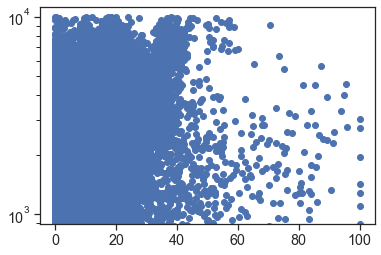

In [169]:
plt.scatter(df["trip_distance"], df["duration"])
plt.yscale('log')
plt.show()

In reality, I expect the trip duration to increase as trip distance increases. But there is another factor which need to consider, traffic. The taxi may be in traffic and the trip time increases. So, I will introduce new feature to calculate the distance.

In [170]:
# def euclidean_distance(x1, x2, y1, y2):
#     return ((abs(x2 - x1) ** 2) + (abs(y2 - y1)) ** 2) ** (1 / 2)

In [171]:
# df['euclidean'] = euclidean_distance(df['pickup_longitude'], df['dropoff_longitude'],
#                                        df['pickup_latitude'], df['dropoff_latitude'])

In [172]:
# df['euclidean'].describe()

In [173]:
# sns.kdeplot(data = df['haversine'])

In [174]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


#  mpu.haversine_distance((lat1, lon1), (lat2, lon2))

let's apply this function to the latitude and longtitudes of pick up drop out records.

In [175]:
df['haversine'] =  haversine_np(df['pickup_longitude'], df['pickup_latitude'],
                         df['dropoff_longitude'], df['dropoff_latitude']) 

In [176]:
# import haversine as hs
# from haversine import Unit

# def haversine_np(lon1, lat1, lon2, lat2):
#     loc1=(lat1,lon1)
#     loc2=(lat2,lon2)

#     km = hs.haversine(loc1,loc2,unit=Unit.KILOMETERS)
#     return km

In [177]:
# df['haversine'] = df.apply(lambda row: haversine_np(df['pickup_longitude'], df['pickup_latitude'],
#                          df['dropoff_longitude'], df['dropoff_latitude'])) 

We also calculate speed for each data point

In [178]:
df['speed'] = (df['haversine']/df['duration'])*3600

In [179]:
df['speed'].describe()

count    1.484066e+07
mean              inf
std               NaN
min      0.000000e+00
25%      1.016383e+01
50%      1.428398e+01
75%      2.005963e+01
max               inf
Name: speed, dtype: float64

In [180]:
df=df.drop(df[df['duration']==0].index, axis=0)

In [181]:
df.speed.max()

10389510.364301946

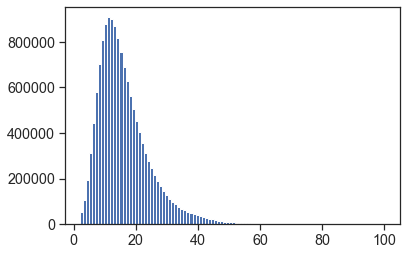

In [182]:
plt.hist(df[(df.speed > 2) & (df.speed <100)]['speed'],bins=100)
plt.show()

In [183]:
df.shape

(14819930, 28)

In [184]:
df[df['speed'] > 100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,tip_amount,tolls_amount,duration,pickup_hour,pickup_day,dropoff_hour,dropoff_day,LaGu_airport,haversine,speed
697,31192E33A41141F325579B7B934EF1A7,B7FB2044B776F94CA3E29C74B1701508,VTS,1,NaN,2013-04-12 23:44:00,2013-04-12 23:48:00,2,240,1.28,...,1.5,0.00,240,23,4,23,4,False,9.830272,147.454087
849,162A967C11C5A4839059F1B1C9868C33,C5000DB015758B40F65FDF3BDCE627D1,VTS,1,NaN,2013-04-12 20:28:00,2013-04-12 20:29:00,1,60,0.49,...,0.0,0.00,60,20,4,20,4,False,2.142945,128.576721
1428,F2DC003B922A092D70D80EC36F2B65D8,3962776A20D3ACC1EB4D698CCDDD2535,VTS,5,NaN,2013-04-12 23:33:00,2013-04-12 23:34:00,1,60,0.00,...,12.0,10.25,60,23,4,23,4,False,8664.152200,519849.131985
1432,4094D065CC47F9CA6FFEA3B0DAAAAD17,E3940E76D6BEBEC06CF0848880013C63,VTS,1,NaN,2013-04-12 21:06:00,2013-04-12 21:21:00,1,900,1.79,...,0.0,0.00,900,21,4,21,4,False,6028.248937,24112.995748
1992,2088AD3CCF67CA0175C6A5D2C06841A5,F981998A1D656109610977B19344FD33,VTS,1,NaN,2013-04-12 23:31:00,2013-04-12 23:34:00,1,180,0.60,...,0.0,0.00,180,23,4,23,4,False,6.197893,123.957856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099178,14D6AF2DF26C81772882686AC9D09EFB,68FD11194B7A72C70AC01EA8F6E0B915,VTS,1,NaN,2013-04-16 19:24:00,2013-04-16 19:32:00,1,480,1.25,...,2.0,0.00,480,19,1,19,1,False,6024.064494,45180.483708
15099353,D30E35828FB1CE27DF24AB1C5E5A472D,D5E8207F24CEF35CA33E75B2F106F126,VTS,1,NaN,2013-04-16 16:51:00,2013-04-16 17:00:00,1,540,0.87,...,0.0,0.00,540,16,1,17,1,False,19.714180,131.427869
15099383,6B943DA2BDA9D93BBE5D4874F5F4D951,C37FA884E48CE5069E1A9A787C9869A6,VTS,1,NaN,2013-04-16 17:59:00,2013-04-16 18:00:00,1,60,0.31,...,1.0,0.00,60,17,1,18,1,False,2.731489,163.889319
15099440,266CCA39BBE9D879BB5CF8DEA1B19871,007E686365B4421FB22F8F2FAF21FBC1,VTS,1,NaN,2013-04-16 17:57:00,2013-04-16 18:00:00,5,180,0.76,...,1.0,0.00,180,17,1,18,1,False,5757.354547,115147.090935


We remove the most extreme values

In [185]:
df = df.drop(df[df['speed'] > 100].index, axis=0)

In [186]:
df.shape

(14799601, 28)

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


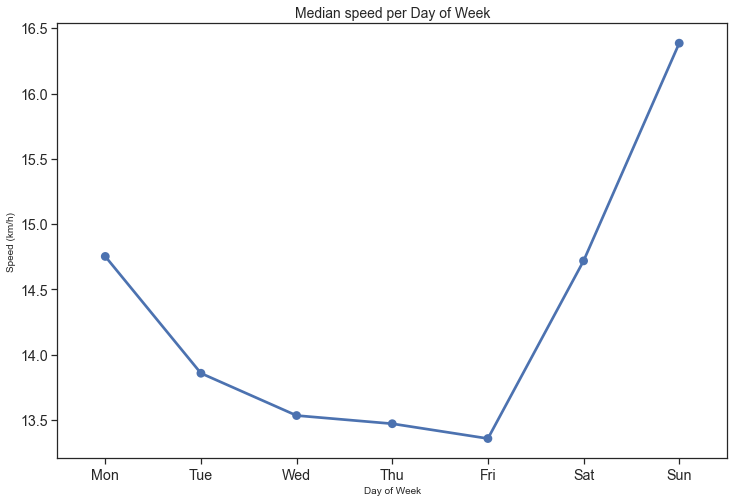

In [187]:
df_agg = df.groupby(df.pickup_datetime.dt.weekday)['speed'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.speed.values)

plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['speed']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Speed (km/h)', fontsize=10)
plt.title('Median speed per Day of Week', loc='Center', fontsize=14)
plt.show()

The average speed value indicates that, there is potentially less traffic on Saturday(s) and Sunday(s) compare to the rest of the week. The speed has the lowest value for Friday(s) which could be due more traffic on that day.

C:\Users\Nastaran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


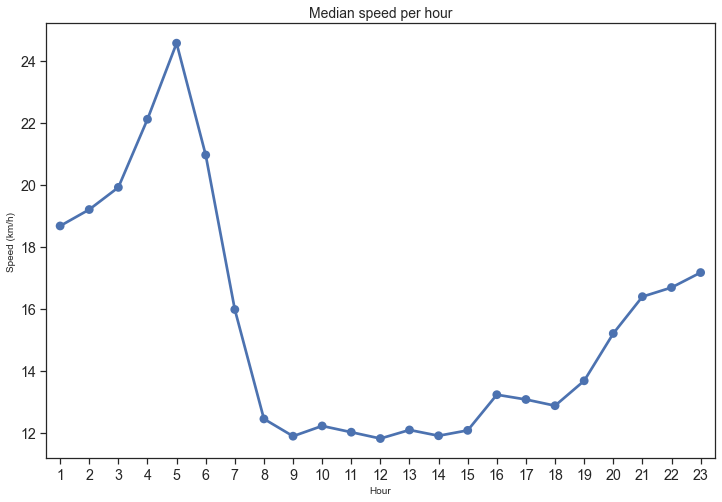

In [188]:
df_agg = df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)['speed'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.speed.values)

plt.xlabel('Hour', fontsize=10)
plt.ylabel('Speed (km/h)', fontsize=10)
plt.title('Median speed per hour', loc='Center', fontsize=14)
plt.show()

The plot of speed as a function of time of day shows that the speed has lowest value from 8 Am to 3 Pm in the afternoon that could be due more traffic at those of the days. The speed increase from 3 PM and reaches its highest value at 5 AM in the morning when we expect less traffic.

We have calculated the average earning for individual trip routs. The result shows that the maximum earning does not necessarily depend on the number of commutes per rout. Some routs can have more earning due to other factor such as distance or duration.    

In [189]:
# df = pd.read_csv('data.csv')
df_profit = df.copy()

In [190]:
df_profit = df_profit[df_profit.duration!=0]

In [191]:
# creating a new column to calculate the fare amount per unit of time (seconds)
df_profit['fare_per_unit_second'] = df_profit['fare_amount'] / df_profit['duration']

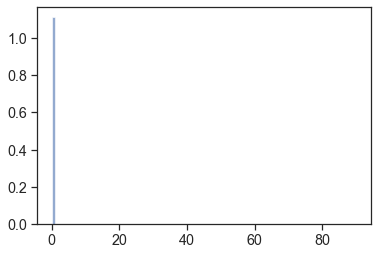

In [192]:
plt.hist(df_profit.fare_per_unit_second, bins=100, density=True, alpha=0.6, color='b')
plt.show()

[array([0.01388889, 0.00531046]), array([0.01960784, 0.02818627])]


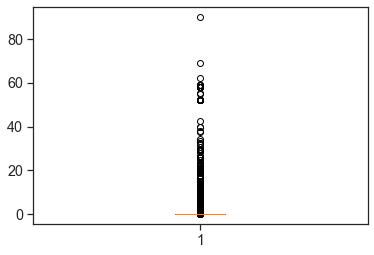

In [193]:
B = plt.boxplot(df_profit['fare_per_unit_second'])
result = [item.get_ydata() for item in B['whiskers']]
print([item.get_ydata() for item in B['whiskers']])

Based on the information from boxplot, the values larger than 0.028 should be considered as outlier. So, we round the 0.028 to 0.03 and remove all the rows with values larger than 0.03. With the same logic, we also remove rows with values smaller than 0.005.

In [194]:
init_size = df_profit.shape[0]

df_profit = df_profit[df_profit['fare_per_unit_second']<=round(result[1][1],2)]
df_profit = df_profit[df_profit['fare_per_unit_second']>=round(result[0][1],3)]

after_drop_size = df_profit.shape[0]

In [195]:
print('So {}% of data is dropped'.format(round(100-(after_drop_size/init_size)*100,2)))

So 3.68% of data is dropped


In [196]:
df_profit.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'duration', 'pickup_hour',
       'pickup_day', 'dropoff_hour', 'dropoff_day', 'LaGu_airport',
       'haversine', 'speed', 'fare_per_unit_second'],
      dtype='object')

In [197]:
# creating a new column to calculate the fare amount per unit of distance (m)
df_profit['fare_per_unit_distance'] = df_profit['fare_amount'] / df_profit['haversine'] 
pd.set_option('use_inf_as_na', True)
df_profit['fare_per_unit_distance'].dropna(inplace=True)

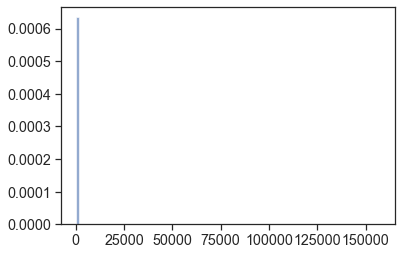

In [198]:
plt.hist(df_profit.fare_per_unit_distance, bins=100, density=True, alpha=0.6, color='b')
plt.show()

[array([3.24195438, 0.21228001]), array([5.30686002, 8.4042167 ])]


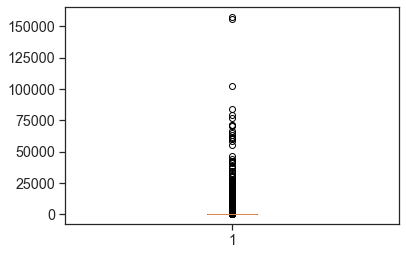

In [199]:
B2 = plt.boxplot(df_profit.fare_per_unit_distance)
result2 = [item.get_ydata() for item in B2['whiskers']]
print([item.get_ydata() for item in B2['whiskers']])

Based on the information from boxplot, the values larger than 8.4 should be considered as outlier. So, we remove all the rows with values larger than 8.4. With the same logic, we also remove rows with values smaller than 0.2.

In [200]:
init_size = df_profit.shape[0]

df_profit.index = range(len(df_profit))
df_profit = df_profit[df_profit['fare_per_unit_distance']<=round(result2[1][1],2)]
df_profit = df_profit[df_profit['fare_per_unit_distance']>=round(result2[0][1],1)]

after_drop_size = df_profit.shape[0]

In [201]:
print('So {}% of data is dropped'.format(round(100-(after_drop_size/init_size)*100,2)))

So 5.75% of data is dropped


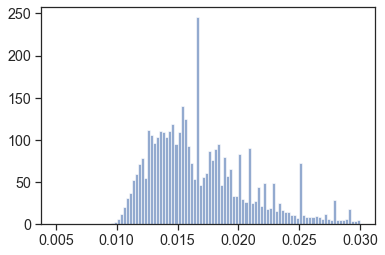

In [202]:
plt.hist(df_profit.fare_per_unit_second, bins=100, density=True, alpha=0.6, color='b')
plt.show()

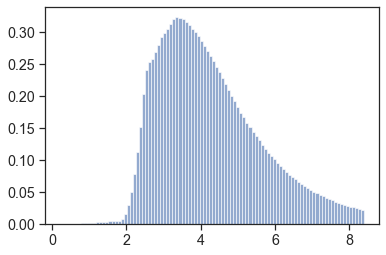

In [203]:
plt.hist(df_profit.fare_per_unit_distance, bins=100, density=True, alpha=0.6, color='b')
plt.show()

In [204]:
df_profit.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'duration', 'pickup_hour',
       'pickup_day', 'dropoff_hour', 'dropoff_day', 'LaGu_airport',
       'haversine', 'speed', 'fare_per_unit_second', 'fare_per_unit_distance'],
      dtype='object')

In [205]:
stat_table = df_profit.groupby('pickup_hour')['fare_per_unit_second'].describe()
stat_table2 = df_profit.groupby('pickup_hour')['fare_per_unit_distance'].describe()

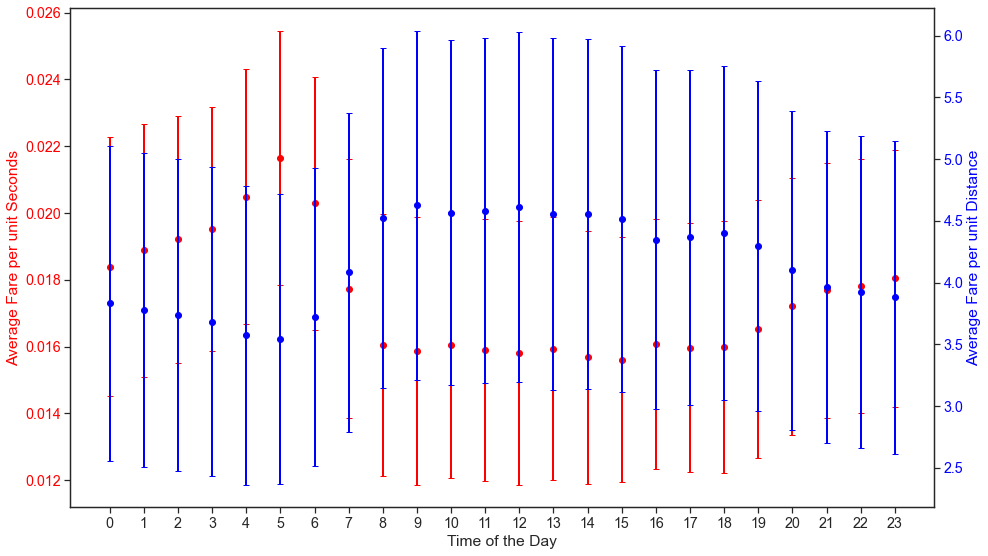

In [206]:
fig, ax1 = plt.subplots(1,1,figsize=(14,8))

color = 'red'
ax1.set_xlabel('Time of the Day')
ax1.set_ylabel('Average Fare per unit Seconds', color=color)
# ax1.plot(t, data1, color=color)
ax1.errorbar(stat_table.index, stat_table['mean'], yerr=stat_table['std'], color = 'red', 
             ecolor = 'red', fmt='o', elinewidth = 2, capsize=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Average Fare per unit Distance', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
plt.errorbar(stat_table2.index, stat_table2['mean'], yerr=stat_table2['std'], color = 'blue', 
             ecolor = 'blue', fmt='o', elinewidth = 2, capsize=3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(stat_table.index)
plt.show()

The above plot shows the average fare per unit of time (seconds) and distance (m). The result shows a mirroring behaviour. We can see that the fare per unit of second reaches its highest value at 5 AM in contrast to fare per unit of distance. It is because of higher trip distance at this time, as shown earlier. So, we can confirm that taxi perhaps charge based on the duration rather than distance, which make sense. However, we cannot assume that due to the higher base charge of fare, the total profitability should high as well. The profitability is also directly proportional to the number of trips. Therefore, we create another column named ‘profit’ which is a product of fare per unit of second and total trips at each time of the day.

In [207]:
stat_table['profit'] = stat_table['mean'] * df_profit.groupby('pickup_hour').size()
stat_table2['profit'] = stat_table2['mean'] * df_profit.groupby('pickup_hour').size()

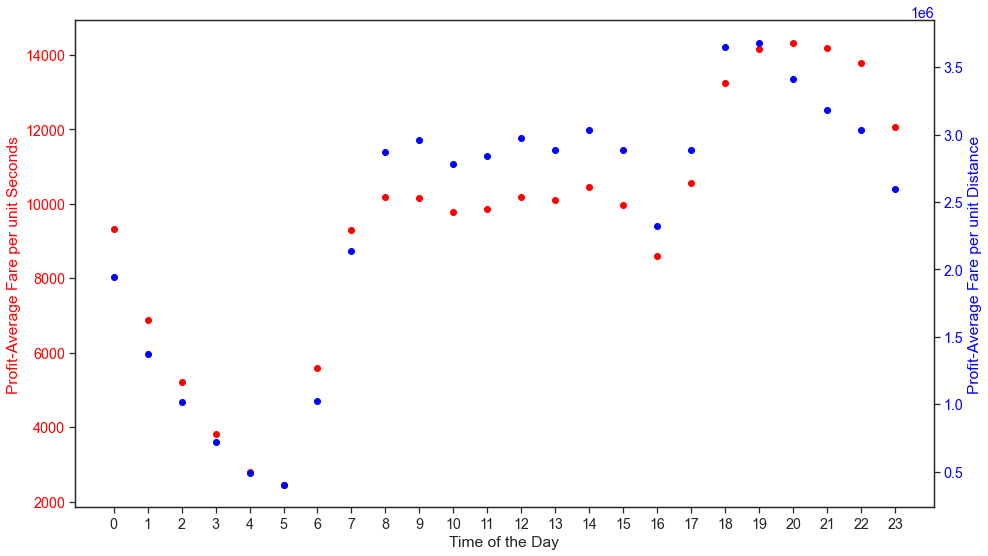

In [208]:
fig, ax1 = plt.subplots(1,1,figsize=(14,8))

color = 'red'
ax1.set_xlabel('Time of the Day')
ax1.set_ylabel('Profit-Average Fare per unit Seconds', color=color)
# ax1.plot(t, data1, color=color)
ax1.scatter(stat_table.index, stat_table['profit'], color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Profit-Average Fare per unit Distance', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
plt.scatter(stat_table2.index, stat_table2['profit'], color = 'blue')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(stat_table.index)
plt.show()

So, here what we can infer is that despite having higher fare value at 5 AM, the trips at 5 AM are not profitable in general due the low number of trips. Moreover, it indicates that the total number of trips at time of day is an important information.   

Therefore, for the taxi company, it would make sense to allocate more taxis at times when more passengers are using taxis which results in more trips.

To conclude, the result shows that the fare per unit second is different at different time of the day. The fare is  almost constant from 8 AM to 6 PM and slowly increases from 7 PM. The price increase reaches its maximum at 5 AM and then drops to lower values. It means that the company perhaps adjusts the fare based on the time of the day to compensate for the number of passengers (As illustrated in the plot below).

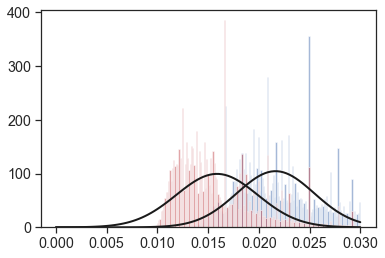

In [209]:
df_hour5 = df_profit[df_profit['pickup_hour']==5].fare_per_unit_second.copy()
df_hour9 = df_profit[df_profit['pickup_hour']==9].fare_per_unit_second.copy()

mu1, std1 = stats.norm.fit(df_hour5) 
mu2, std2 = stats.norm.fit(df_hour9) 

# Plot the histogram.
plt.hist(df_hour5, bins=200, density=True, alpha=0.5, color='b')
plt.hist(df_hour9, bins=200, density=True, alpha=0.5, color='r')

x = np.linspace(0, 0.03, 100)
p1 = stats.norm.pdf(x, mu1, std1)
p2 = stats.norm.pdf(x, mu2, std2)
  
plt.plot(x, p1, 'k', linewidth=2)
plt.plot(x, p2, 'k', linewidth=2)
plt.show()

#### Open Questions c - If you were a taxi owner, how would you maximize your earnings in a day?

As stated earlier, a taxi owner in a day per average rears 470 USD and a taxi driver earns 252 USD. We have confirmed that the main factor for a general profitability is the number of trips per day. So, the taxi owner should allocate its taxi to:

1. Routes with highest average fare with low standard deviation ensure. For instance, the airport trips have high standard deviation and perhaps not a good choice. 
2.	Hours that ensure highest profitability. 8 AM to 5 PM medium profitability and 6 to 10 PM high profitability.
3.	Busy locations in the city.


We should however consider that the driver cannot choose the trip. If they a make trip to any another less profitable rout, they should make sure to drive to destinations with the above characteristics immediately after dropoff.


#### Open Questions d - If you were a taxi owner, how would you minimize your work time while retaining the average wages earned by a typical taxi in the dataset?

A taxi owner can minimize the working time of while retaining the average earning by skipping times that are not very profitable. For instance, we have showed that profitability 8 AM to 5 PM and 6 to 10 PM can be categorized as medium and high, respectively. So, the drivers, can skip the midnight or early morning times that do not result in large revenue. Moreover, the drivers can skip a day such Sunday when there are not large number of passengers available.

#### Open Questions e - If you run a taxi company with 10 taxis, how would you maximize your earnings?

A taxi company with 10 taxis can operate with these taxis 24/7 using different taxi drivers. So, to maximize the profit, the company need to ensure a proper instruction for the taxi drivers based on the points mentioned in the last two previous questions.

To Summarize, a Taxi driver’s minimum expected earning is 252 USD. To achieve that expectation, the driver need prioritize routs with highest earning per unit time and low standard deviation. However, if the expectation met to some extent, they could also focus on trips with higher standard deviation. They should also ensure to work on the locations with larger number of passengers available or choose locations with highest return per number of trips.


#### Removing missing values

Let's check for the missing values in each columns



In [210]:
df.isnull().any().sum()

1

There are three columns with null values. 

In [211]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()*100/len(df)).sort_values(ascending=False)

table_miss_val = pd.concat([count,percentage], axis=1, keys=['Count', 'Percentage (%)'])

table_miss_val.head(5)


,Count,Percentage (%)
store_and_fwd_flag,7383990,49.893169
speed,0,0.000000
haversine,0,0.000000
hack_license,0,0.000000
vendor_id,0,0.000000


We drop the store_and_fwd_flag column which has almost 50% null values.

In [212]:
df=df.drop(['store_and_fwd_flag'], axis=1)

Then, we delete all the rows which have null values

In [213]:
print('The previous data size was {}'.format(df.shape))
df = df.dropna(how = 'any', axis = 'rows')
print('The current data size is {}'.format(df.shape))


The previous data size was (14799601, 27)
The current data size is (14799601, 27)


In [ ]:
#saving the dataframe 
# df.to_csv('data.csv')